In [1]:
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data_original/wind_farms/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [3]:
for dataset in [Dataset_WF_site1]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']

In [4]:
Dataset_WF_site1.drop(['WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H'], axis=1,inplace=True)

In [5]:
time_format = "%Y-%m-%d %H:%M:%S"

In [6]:
x= Dataset_WF_site1['time'][1]
y = datetime.strptime(x , time_format)
print(y.year)

2019


In [7]:
Dataset_WF_site1.time=pd.to_datetime(Dataset_WF_site1["time"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

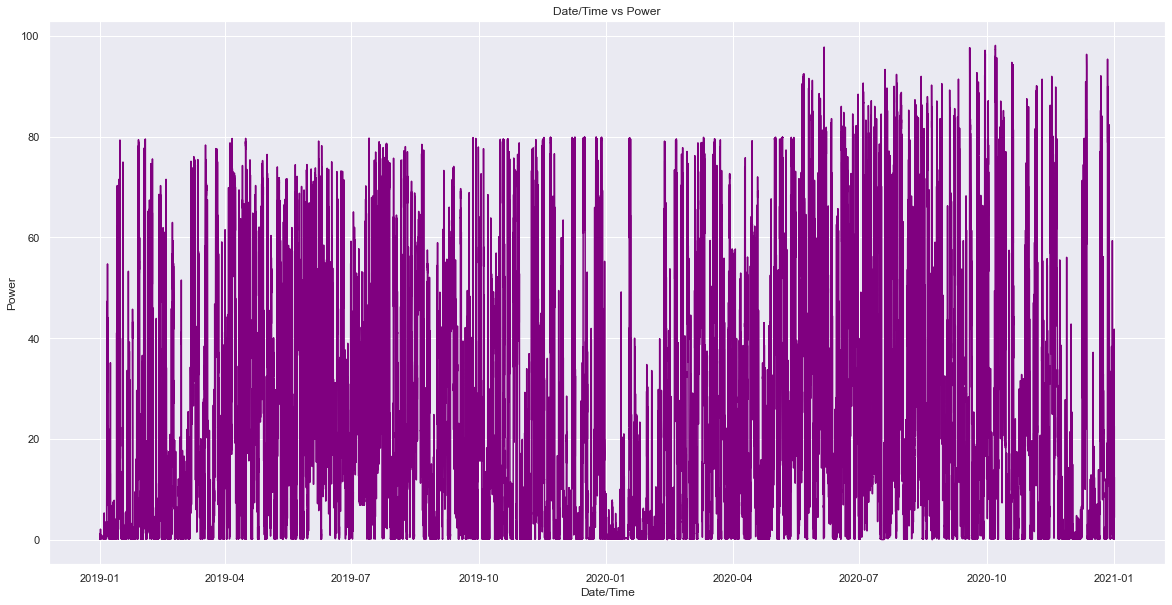

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(Dataset_WF_site1['time'],
        Dataset_WF_site1['Power(MW)'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date/Time",
       ylabel="Power",
       title="Date/Time vs Power")
plt.savefig('./Datetime vs Power (WF1)')

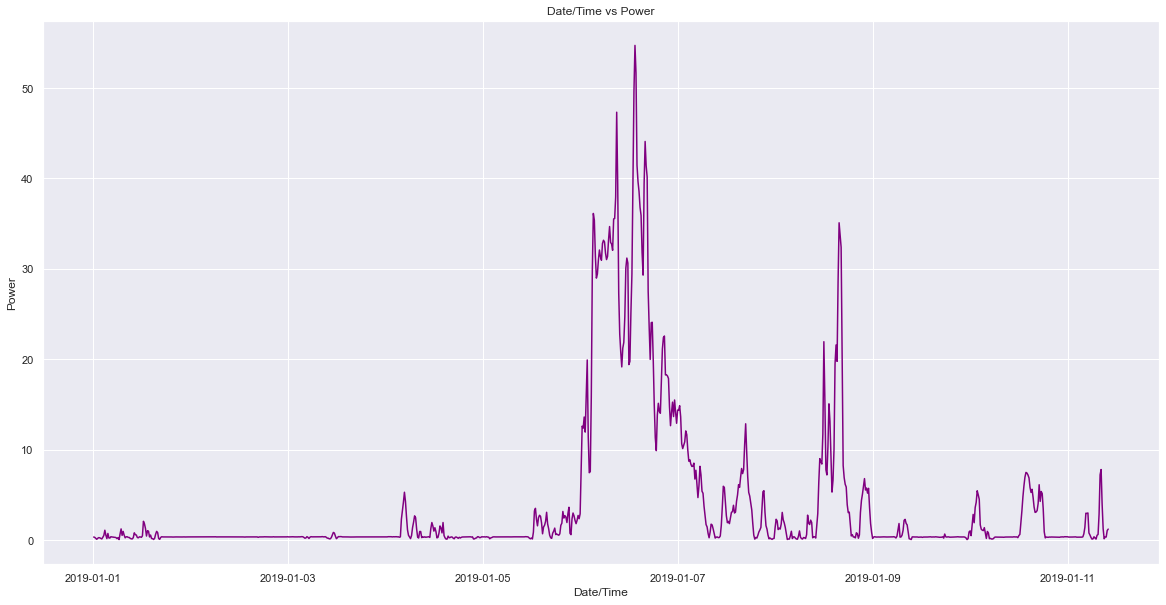

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(Dataset_WF_site1['time'][0:1000],
        Dataset_WF_site1['Power(MW)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date/Time",
       ylabel="Power",
       title="Date/Time vs Power")
plt.savefig('./Datetime vs Power 10days (WF1)')

In [10]:
Dataset_WF_site1.dtypes

time         datetime64[ns]
Power(MW)           float64
dtype: object

In [11]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-11-66b0dd25839b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [12]:
Dataset_WF_site1 = Dataset_WF_site1.set_index('time')

In [13]:
batch_size_exp = 1
epoch_exp = 10
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [14]:
import numpy as np

def sampling(sequence, n_steps):
    
    X, Y = list(), list()

    for i in range(len(sequence)):

        sam = i + n_steps
        if sam > len(sequence)-1:
            break

        x, y = sequence[i:sam], sequence[sam]

        X.append(x)

        Y.append(y)

    return np.array(X), np.array(Y)

In [15]:
n_steps = 3

X, Y = sampling(Dataset_WF_site1['Power(MW)'].tolist(), n_steps)

In [16]:
for i in range(len(X)):

    print(X[i], Y[i])

[0.329703 0.296306 0.18759 ] 0.081005
[0.296306 0.18759  0.081005] 0.189721
[0.18759  0.081005 0.189721] 0.265041
[0.081005 0.189721 0.265041] 0.241593
[0.189721 0.265041 0.241593] 0.184037
[0.265041 0.241593 0.184037] 0.119375
[0.241593 0.184037 0.119375] 0.30128
[0.184037 0.119375 0.30128 ] 0.508055
[0.119375 0.30128  0.508055] 1.082193
[0.30128  0.508055 1.082193] 0.537188
[0.508055 1.082193 0.537188] 0.156325
[1.082193 0.537188 0.156325] 0.724778
[0.537188 0.156325 0.724778] 0.226671
[0.156325 0.724778 0.226671] 0.218855
[0.724778 0.226671 0.218855] 0.366652
[0.226671 0.218855 0.366652] 0.333966
[0.218855 0.366652 0.333966] 0.328282
[0.366652 0.333966 0.328282] 0.301991
[0.333966 0.328282 0.301991] 0.297017
[0.328282 0.301991 0.297017] 0.267173
[0.301991 0.297017 0.267173] 0.153482
[0.297017 0.267173 0.153482] 0.266463
[0.267173 0.153482 0.266463] 0.04974
[0.153482 0.266463 0.04974 ] 0.674328
[0.266463 0.04974  0.674328] 1.227149
[0.04974  0.674328 1.227149] 0.508766
[0.674328 1.22

[5.267431 4.859565 4.124839] 3.326162
[4.859565 4.124839 3.326162] 1.83113
[4.124839 3.326162 1.83113 ] 0.530083
[3.326162 1.83113  0.530083] 0.099479
[1.83113  0.530083 0.099479] 0.284227
[0.530083 0.099479 0.284227] 0.213881
[0.099479 0.284227 0.213881] 0.515161
[0.284227 0.213881 0.515161] 0.888919
[0.213881 0.515161 0.888919] 1.114169
[0.515161 0.888919 1.114169] 1.394842
[0.888919 1.114169 1.394842] 3.362401
[1.114169 1.394842 3.362401] 5.339198
[1.394842 3.362401 5.339198] 5.455731
[3.362401 5.339198 5.455731] 3.077464
[5.339198 5.455731 3.077464] 1.585274
[5.455731 3.077464 1.585274] 1.206542
[3.077464 1.585274 1.206542] 0.530083
[1.585274 1.206542 0.530083] 0.133586
[1.206542 0.530083 0.133586] 0.214591
[0.530083 0.133586 0.214591] 0.132876
[0.133586 0.214591 0.132876] 0.071057
[0.214591 0.132876 0.071057] 0.154193
[0.132876 0.071057 0.154193] 0.184037
[0.071057 0.154193 0.184037] 1.374236
[0.154193 0.184037 1.374236] 2.29442
[0.184037 1.374236 2.29442 ] 2.111094
[1.374236 2.29

[1.622934 1.174567 0.998346] 0.621746
[1.174567 0.998346 0.621746] 0.083136
[0.998346 0.621746 0.083136] 0.221697
[0.621746 0.083136 0.221697] 0.303412
[0.083136 0.221697 0.303412] 0.30128
[0.221697 0.303412 0.30128 ] 0.319755
[0.303412 0.30128  0.319755] 0.304123
[0.30128  0.319755 0.304123] 0.298438
[0.319755 0.304123 0.298438] 0.295596
[0.304123 0.298438 0.295596] 0.120796
[0.298438 0.295596 0.120796] 0.135008
[0.295596 0.120796 0.135008] 0.660116
[0.120796 0.135008 0.660116] 1.15396
[0.135008 0.660116 1.15396 ] 1.754389
[0.660116 1.15396  1.754389] 2.652545
[1.15396  1.754389 2.652545] 2.845109
[1.754389 2.652545 2.845109] 2.824502
[2.652545 2.845109 2.824502] 2.853636
[2.845109 2.824502 2.853636] 3.643075
[2.824502 2.853636 3.643075] 3.957856
[2.853636 3.643075 3.957856] 5.182873
[3.643075 3.957856 5.182873] 7.948399
[3.957856 5.182873 7.948399] 9.195443
[5.182873 7.948399 9.195443] 9.264368
[7.948399 9.195443 9.264368] 11.901991
[ 9.195443  9.264368 11.901991] 13.372865
[ 9.26436

[4.691872 2.283761 0.434867] 0.637378
[2.283761 0.434867 0.637378] 1.866659
[0.434867 0.637378 1.866659] 2.52038
[0.637378 1.866659 2.52038 ] 2.843688
[1.866659 2.52038  2.843688] 7.232147
[2.52038  2.843688 7.232147] 11.705164
[ 2.843688  7.232147 11.705164] 9.477538
[ 7.232147 11.705164  9.477538] 10.494359
[11.705164  9.477538 10.494359] 12.223878
[ 9.477538 10.494359 12.223878] 20.168724
[10.494359 12.223878 20.168724] 23.88641
[12.223878 20.168724 23.88641 ] 15.593385
[20.168724 23.88641  15.593385] 13.017581
[23.88641  15.593385 13.017581] 14.885661
[15.593385 13.017581 14.885661] 8.747075
[13.017581 14.885661  8.747075] 7.640724
[14.885661  8.747075  7.640724] 10.23287
[ 8.747075  7.640724 10.23287 ] 20.010267
[ 7.640724 10.23287  20.010267] 10.763664
[10.23287  20.010267 10.763664] 9.902457
[20.010267 10.763664  9.902457] 9.94367
[10.763664  9.902457  9.94367 ] 13.452448
[ 9.902457  9.94367  13.452448] 16.457434
[ 9.94367  13.452448 16.457434] 13.069453
[13.452448 16.457434 13.

[9.184074 7.158249 5.339909] 5.338487
[7.158249 5.339909 5.338487] 5.766248
[5.339909 5.338487 5.766248] 5.83091
[5.338487 5.766248 5.83091 ] 6.279277
[5.766248 5.83091  6.279277] 8.616332
[5.83091  6.279277 8.616332] 11.163002
[ 6.279277  8.616332 11.163002] 10.179578
[ 8.616332 11.163002 10.179578] 10.236423
[11.163002 10.179578 10.236423] 13.190959
[10.179578 10.236423 13.190959] 11.820276
[10.236423 13.190959 11.820276] 12.003602
[13.190959 11.820276 12.003602] 11.299431
[11.820276 12.003602 11.299431] 12.275039
[12.003602 11.299431 12.275039] 14.782629
[11.299431 12.275039 14.782629] 13.995321
[12.275039 14.782629 13.995321] 12.925207
[14.782629 13.995321 12.925207] 13.323125
[13.995321 12.925207 13.323125] 13.70541
[12.925207 13.323125 13.70541 ] 16.033937
[13.323125 13.70541  16.033937] 10.022542
[13.70541  16.033937 10.022542] 6.582689
[16.033937 10.022542  6.582689] 7.74873
[10.022542  6.582689  7.74873 ] 8.146647
[6.582689 7.74873  8.146647] 9.424245
[7.74873  8.146647 9.4242

[64.45834 67.55855 67.01567] 61.9607
[67.55855 67.01567 61.9607 ] 58.500954
[67.01567  61.9607   58.500954] 60.627678
[61.9607   58.500954 60.627678] 62.03531
[58.500954 60.627678 62.03531 ] 62.829014
[60.627678 62.03531  62.829014] 60.48059
[62.03531  62.829014 60.48059 ] 59.23852
[62.829014 60.48059  59.23852 ] 56.94339
[60.48059 59.23852 56.94339] 57.774044
[59.23852  56.94339  57.774044] 55.24727
[56.94339  57.774044 55.24727 ] 50.167427
[57.774044 55.24727  50.167427] 50.05729
[55.24727  50.167427 50.05729 ] 53.081463
[50.167427 50.05729  53.081463] 53.524143
[50.05729  53.081463 53.524143] 55.974888
[53.081463 53.524143 55.974888] 65.954796
[53.524143 55.974888 65.954796] 66.95457
[55.974888 65.954796 66.95457 ] 68.6919
[65.954796 66.95457  68.6919  ] 70.061165
[66.95457  68.6919   70.061165] 72.48277
[68.6919   70.061165 72.48277 ] 74.28264
[70.061165 72.48277  74.28264 ] 77.40416
[72.48277 74.28264 77.40416] 79.385216
[74.28264  77.40416  79.385216] 79.51596
[77.40416  79.38521

[18.211823 17.628448 21.415058] 26.737911
[17.628448 21.415058 26.737911] 28.81703
[21.415058 26.737911 28.81703 ] 25.674906
[26.737911 28.81703  25.674906] 22.175364
[28.81703  25.674906 22.175364] 21.564276
[25.674906 22.175364 21.564276] 15.758237
[22.175364 21.564276 15.758237] 12.22672
[21.564276 15.758237 12.22672 ] 13.974714
[15.758237 12.22672  13.974714] 15.034169
[12.22672  13.974714 15.034169] 15.716313
[13.974714 15.034169 15.716313] 14.355578
[15.034169 15.716313 14.355578] 16.11494
[15.716313 14.355578 16.11494 ] 16.091494
[14.355578 16.11494  16.091494] 20.633434
[16.11494  16.091494 20.633434] 17.20353
[16.091494 20.633434 17.20353 ] 11.425912
[20.633434 17.20353  11.425912] 7.804864
[17.20353  11.425912  7.804864] 3.978463
[11.425912  7.804864  3.978463] 3.224552
[7.804864 3.978463 3.224552] 0.973476
[3.978463 3.224552 0.973476] 0.204643
[3.224552 0.973476 0.204643] 0.233776
[0.973476 0.204643 0.233776] 0.886076
[0.204643 0.233776 0.886076] 2.436533
[0.233776 0.886076 

[1.896502 2.538144 3.088122] 2.295841
[2.538144 3.088122 2.295841] 1.261256
[3.088122 2.295841 1.261256] 1.581721
[2.295841 1.261256 1.581721] 1.477268
[1.261256 1.581721 1.477268] 0.820704
[1.581721 1.477268 0.820704] 0.616061
[1.477268 0.820704 0.616061] 0.815731
[0.820704 0.616061 0.815731] 0.468263
[0.616061 0.815731 0.468263] 0.7397
[0.815731 0.468263 0.7397  ] 1.465188
[0.468263 0.7397   1.465188] 2.753446
[0.7397   1.465188 2.753446] 2.128147
[1.465188 2.753446 2.128147] 1.81834
[2.753446 2.128147 1.81834 ] 0.903841
[2.128147 1.81834  0.903841] 1.055902
[1.81834  0.903841 1.055902] 1.324496
[0.903841 1.055902 1.324496] 0.849838
[1.055902 1.324496 0.849838] 0.296306
[1.324496 0.849838 0.296306] 0.31336
[0.849838 0.296306 0.31336 ] 0.805072
[0.296306 0.31336  0.805072] 0.13714
[0.31336  0.805072 0.13714 ] 0.344625
[0.805072 0.13714  0.344625] 0.297017
[0.13714  0.344625 0.297017] 0.291332
[0.344625 0.297017 0.291332] 0.302701
[0.297017 0.291332 0.302701] 0.311228
[0.291332 0.30270

[0.427051 2.138806 2.623412] 1.285415
[2.138806 2.623412 1.285415] 1.277599
[2.623412 1.285415 1.277599] 3.052594
[1.285415 1.277599 3.052594] 4.059467
[1.277599 3.052594 4.059467] 4.692582
[3.052594 4.059467 4.692582] 3.201103
[4.059467 4.692582 3.201103] 1.272625
[4.692582 3.201103 1.272625] 0.184747
[3.201103 1.272625 0.184747] 0.269305
[1.272625 0.184747 0.269305] 0.331124
[0.184747 0.269305 0.331124] 0.342493
[0.269305 0.331124 0.342493] 0.245856
[0.331124 0.342493 0.245856] 2.324264
[0.342493 0.245856 2.324264] 3.090965
[0.245856 2.324264 3.090965] 2.53317
[2.324264 3.090965 2.53317 ] 3.963541
[3.090965 2.53317  3.963541] 4.014701
[2.53317  3.963541 4.014701] 2.606359
[3.963541 4.014701 2.606359] 2.364766
[4.014701 2.606359 2.364766] 1.340839
[2.606359 2.364766 1.340839] 1.293231
[2.364766 1.340839 1.293231] 1.288257
[1.340839 1.293231 1.288257] 0.186169
[1.293231 1.288257 0.186169] 0.159167
[1.288257 0.186169 0.159167] 0.309807
[0.186169 0.159167 0.309807] 0.299859
[0.159167 0.3

[19.820545 18.918127 17.262506] 19.955553
[18.918127 17.262506 19.955553] 18.280039
[17.262506 19.955553 18.280039] 16.82693
[19.955553 18.280039 16.82693 ] 16.72816
[18.280039 16.82693  16.72816 ] 14.280258
[16.82693  16.72816  14.280258] 15.321949
[16.72816  14.280258 15.321949] 13.69333
[14.280258 15.321949 13.69333 ] 14.978034
[15.321949 13.69333  14.978034] 13.920001
[13.69333  14.978034 13.920001] 14.506219
[14.978034 13.920001 14.506219] 14.459321
[13.920001 14.506219 14.459321] 13.359364
[14.506219 14.459321 13.359364] 12.69072
[14.459321 13.359364 12.69072 ] 15.055486
[13.359364 12.69072  15.055486] 15.726261
[12.69072  15.055486 15.726261] 12.381624
[15.055486 15.726261 12.381624] 11.56163
[15.726261 12.381624 11.56163 ] 9.835663
[12.381624 11.56163   9.835663] 8.431584
[11.56163   9.835663  8.431584] 7.164643
[9.835663 8.431584 7.164643] 6.931578
[8.431584 7.164643 6.931578] 6.290647
[7.164643 6.931578 6.290647] 5.548815
[6.931578 6.290647 5.548815] 5.393201
[6.290647 5.5488

[25.40702  25.287645 24.523787] 23.932594
[25.287645 24.523787 23.932594] 23.358458
[24.523787 23.932594 23.358458] 21.58204
[23.932594 23.358458 21.58204 ] 21.103119
[23.358458 21.58204  21.103119] 18.329777
[21.58204  21.103119 18.329777] 18.979944
[21.103119 18.329777 18.979944] 16.033226
[18.329777 18.979944 16.033226] 10.735952
[18.979944 16.033226 10.735952] 7.485109
[16.033226 10.735952  7.485109] 5.258904
[10.735952  7.485109  5.258904] 3.214603
[7.485109 5.258904 3.214603] 1.3046
[5.258904 3.214603 1.3046  ] 0.260067
[3.214603 1.3046   0.260067] 0.173378
[1.3046   0.260067 0.173378] 0.304123
[0.260067 0.173378 0.304123] 0.230224
[0.173378 0.304123 0.230224] 0.22596
[0.304123 0.230224 0.22596 ] 0.247277
[0.230224 0.22596  0.247277] 0.255804
[0.22596  0.247277 0.255804] 0.247277
[0.247277 0.255804 0.247277] 0.260067
[0.255804 0.247277 0.260067] 0.258646
[0.247277 0.260067 0.258646] 0.267173
[0.260067 0.258646 0.267173] 0.271436
[0.258646 0.267173 0.271436] 0.266462
[0.267173 0.2

[25.550556 33.94235  35.921986] 39.382446
[33.94235  35.921986 39.382446] 42.29861
[35.921986 39.382446 42.29861 ] 41.639915
[39.382446 42.29861  41.639915] 37.959183
[42.29861  41.639915 37.959183] 32.78057
[41.639915 37.959183 32.78057 ] 30.154318
[37.959183 32.78057  30.154318] 24.446335
[32.78057  30.154318 24.446335] 20.720123
[30.154318 24.446335 20.720123] 19.462421
[24.446335 20.720123 19.462421] 19.384258
[20.720123 19.462421 19.384258] 17.560232
[19.462421 19.384258 17.560232] 12.112319
[19.384258 17.560232 12.112319] 6.310542
[17.560232 12.112319  6.310542] 2.300815
[12.112319  6.310542  2.300815] 1.487216
[6.310542 2.300815 1.487216] 1.488637
[2.300815 1.487216 1.488637] 2.388214
[1.487216 1.488637 2.388214] 4.964729
[1.488637 2.388214 4.964729] 6.556398
[2.388214 4.964729 6.556398] 7.671277
[4.964729 6.556398 7.671277] 7.819786
[6.556398 7.671277 7.819786] 6.655878
[7.671277 7.819786 6.655878] 4.876619
[7.819786 6.655878 4.876619] 3.935118
[6.655878 4.876619 3.935118] 5.22

[4.259847 2.165096 5.202058] 8.711547
[2.165096 5.202058 8.711547] 12.253011
[ 5.202058  8.711547 12.253011] 21.46764
[ 8.711547 12.253011 21.46764 ] 42.75977
[12.253011 21.46764  42.75977 ] 49.778748
[21.46764  42.75977  49.778748] 43.012733
[42.75977  49.778748 43.012733] 35.445194
[49.778748 43.012733 35.445194] 31.805674
[43.012733 35.445194 31.805674] 34.44685
[35.445194 31.805674 34.44685 ] 24.983522
[31.805674 34.44685  24.983522] 18.24522
[34.44685  24.983522 18.24522 ] 18.590555
[24.983522 18.24522  18.590555] 19.785728
[18.24522  18.590555 19.785728] 26.359892
[18.590555 19.785728 26.359892] 28.52783
[19.785728 26.359892 28.52783 ] 35.179443
[26.359892 28.52783  35.179443] 58.313362
[28.52783  35.179443 58.313362] 43.559155
[35.179443 58.313362 43.559155] 33.29218
[58.313362 43.559155 33.29218 ] 30.18203
[43.559155 33.29218  30.18203 ] 32.3116
[33.29218 30.18203 32.3116 ] 38.70101
[30.18203 32.3116  38.70101] 38.085663
[32.3116   38.70101  38.085663] 26.365576
[38.70101  38.0

[10.601654 10.800613  6.948631] 4.673397
[10.800613  6.948631  4.673397] 5.875676
[6.948631 4.673397 5.875676] 5.698034
[4.673397 5.875676 5.698034] 6.434181
[5.875676 5.698034 6.434181] 8.412399
[5.698034 6.434181 8.412399] 11.904123
[ 6.434181  8.412399 11.904123] 20.698807
[ 8.412399 11.904123 20.698807] 27.042746
[11.904123 20.698807 27.042746] 21.496773
[20.698807 27.042746 21.496773] 23.823168
[27.042746 21.496773 23.823168] 29.801876
[21.496773 23.823168 29.801876] 19.895866
[23.823168 29.801876 19.895866] 19.7502
[29.801876 19.895866 19.7502  ] 22.642206
[19.895866 19.7502   22.642206] 21.88261
[19.7502   22.642206 21.88261 ] 18.078947
[22.642206 21.88261  18.078947] 12.121557
[21.88261  18.078947 12.121557] 4.68974
[18.078947 12.121557  4.68974 ] 7.331627
[12.121557  4.68974   7.331627] 8.809605
[4.68974  7.331627 8.809605] 9.297054
[7.331627 8.809605 9.297054] 9.227419
[8.809605 9.297054 9.227419] 10.365746
[ 9.297054  9.227419 10.365746] 10.637183
[ 9.227419 10.365746 10.637

[0.233066 0.321176 0.277121] 0.274279
[0.321176 0.277121 0.274279] 0.274279
[0.277121 0.274279 0.274279] 0.271436
[0.274279 0.274279 0.271436] 0.287069
[0.274279 0.271436 0.287069] 0.196827
[0.271436 0.287069 0.196827] 0.274279
[0.287069 0.196827 0.274279] 0.240172
[0.196827 0.274279 0.240172] 0.241593
[0.274279 0.240172 0.241593] 0.248698
[0.240172 0.241593 0.248698] 1.134064
[0.241593 0.248698 1.134064] 4.101391
[0.248698 1.134064 4.101391] 5.397464
[1.134064 4.101391 5.397464] 4.610867
[4.101391 5.397464 4.610867] 4.850328
[5.397464 4.610867 4.850328] 13.846102
[ 4.610867  4.850328 13.846102] 19.459578
[ 4.850328 13.846102 19.459578] 16.108545
[13.846102 19.459578 16.108545] 19.217985
[19.459578 16.108545 19.217985] 33.53164
[16.108545 19.217985 33.53164 ] 36.131603
[19.217985 33.53164  36.131603] 31.744566
[33.53164  36.131603 31.744566] 26.743597
[36.131603 31.744566 26.743597] 24.550789
[31.744566 26.743597 24.550789] 27.790972
[26.743597 24.550789 27.790972] 28.324608
[24.550789

[75.08415 68.8802  70.37452] 70.01994
[68.8802  70.37452 70.01994] 68.60663
[70.37452 70.01994 68.60663] 66.343475
[70.01994  68.60663  66.343475] 65.58246
[68.60663  66.343475 65.58246 ] 64.81576
[66.343475 65.58246  64.81576 ] 64.92021
[65.58246 64.81576 64.92021] 62.669136
[64.81576  64.92021  62.669136] 63.673878
[64.92021  62.669136 63.673878] 63.628403
[62.669136 63.673878 63.628403] 63.259617
[63.673878 63.628403 63.259617] 61.873302
[63.628403 63.259617 61.873302] 60.297264
[63.259617 61.873302 60.297264] 60.081253
[61.873302 60.297264 60.081253] 60.032223
[60.297264 60.081253 60.032223] 60.469223
[60.081253 60.032223 60.469223] 59.902187
[60.032223 60.469223 59.902187] 59.43535
[60.469223 59.902187 59.43535 ] 59.86311
[59.902187 59.43535  59.86311 ] 60.31503
[59.43535 59.86311 60.31503] 59.61299
[59.86311 60.31503 59.61299] 60.025116
[60.31503  59.61299  60.025116] 61.097363
[59.61299  60.025116 61.097363] 59.92635
[60.025116 61.097363 59.92635 ] 54.140205
[61.097363 59.92635 

[ 0.28849   1.548325 12.065422] 36.30143
[ 1.548325 12.065422 36.30143 ] 55.37233
[12.065422 36.30143  55.37233 ] 50.477943
[36.30143  55.37233  50.477943] 54.23187
[55.37233  50.477943 54.23187 ] 58.905266
[50.477943 54.23187  58.905266] 47.487167
[54.23187  58.905266 47.487167] 42.857826
[58.905266 47.487167 42.857826] 46.340313
[47.487167 42.857826 46.340313] 59.598778
[42.857826 46.340313 59.598778] 54.666737
[46.340313 59.598778 54.666737] 47.713127
[59.598778 54.666737 47.713127] 60.79324
[54.666737 47.713127 60.79324 ] 62.779984
[47.713127 60.79324  62.779984] 49.51868
[60.79324  62.779984 49.51868 ] 37.638004
[62.779984 49.51868  37.638004] 32.380524
[49.51868  37.638004 32.380524] 37.839096
[37.638004 32.380524 37.839096] 43.461807
[32.380524 37.839096 43.461807] 42.830826
[37.839096 43.461807 42.830826] 37.20527
[43.461807 42.830826 37.20527 ] 32.096294
[42.830826 37.20527  32.096294] 31.75025
[37.20527  32.096294 31.75025 ] 36.09039
[32.096294 31.75025  36.09039 ] 43.090183


[53.13049  45.322075 46.67144 ] 49.18187
[45.322075 46.67144  49.18187 ] 52.532192
[46.67144  49.18187  52.532192] 53.52201
[49.18187  52.532192 53.52201 ] 55.996204
[52.532192 53.52201  55.996204] 58.39934
[53.52201  55.996204 58.39934 ] 61.829956
[55.996204 58.39934  61.829956] 61.37022
[58.39934  61.829956 61.37022 ] 62.043125
[61.829956 61.37022  62.043125] 62.406227
[61.37022  62.043125 62.406227] 63.046448
[62.043125 62.406227 63.046448] 61.866196
[62.406227 63.046448 61.866196] 48.884144
[63.046448 61.866196 48.884144] 42.927464
[61.866196 48.884144 42.927464] 43.0376
[48.884144 42.927464 43.0376  ] 46.291996
[42.927464 43.0376   46.291996] 49.339615
[43.0376   46.291996 49.339615] 51.98861
[46.291996 49.339615 51.98861 ] 52.087376
[49.339615 51.98861  52.087376] 52.547115
[51.98861  52.087376 52.547115] 52.56204
[52.087376 52.547115 52.56204 ] 52.446926
[52.547115 52.56204  52.446926] 51.518215
[52.56204  52.446926 51.518215] 52.56559
[52.446926 51.518215 52.56559 ] 54.818085
[

[32.133244 26.43379  23.040834] 30.60979
[26.43379  23.040834 30.60979 ] 31.099371
[23.040834 30.60979  31.099371] 27.930243
[30.60979  31.099371 27.930243] 27.290024
[31.099371 27.930243 27.290024] 27.513142
[27.930243 27.290024 27.513142] 30.82438
[27.290024 27.513142 30.82438 ] 19.22296
[27.513142 30.82438  19.22296 ] 20.421686
[30.82438  19.22296  20.421686] 24.839989
[19.22296  20.421686 24.839989] 29.418169
[20.421686 24.839989 29.418169] 30.913914
[24.839989 29.418169 30.913914] 26.151695
[29.418169 30.913914 26.151695] 25.10574
[30.913914 26.151695 25.10574 ] 26.875051
[26.151695 25.10574  26.875051] 29.395432
[25.10574  26.875051 29.395432] 22.02046
[26.875051 29.395432 22.02046 ] 23.180105
[29.395432 22.02046  23.180105] 28.871744
[22.02046  23.180105 28.871744] 31.655745
[23.180105 28.871744 31.655745] 33.527378
[28.871744 31.655745 33.527378] 41.11765
[31.655745 33.527378 41.11765 ] 40.372265
[33.527378 41.11765  40.372265] 28.57899
[41.11765  40.372265 28.57899 ] 19.573269

[0.183326 0.179063 0.176221] 0.171957
[0.179063 0.176221 0.171957] 0.170536
[0.176221 0.171957 0.170536] 0.194695
[0.171957 0.170536 0.194695] 0.208907
[0.170536 0.194695 0.208907] 0.197538
[0.194695 0.208907 0.197538] 0.184747
[0.208907 0.197538 0.184747] 0.180484
[0.197538 0.184747 0.180484] 0.191853
[0.184747 0.180484 0.191853] 0.198959
[0.180484 0.191853 0.198959] 0.218855
[0.191853 0.198959 0.218855] 0.214591
[0.198959 0.218855 0.214591] 0.231645
[0.218855 0.214591 0.231645] 0.245856
[0.214591 0.231645 0.245856] 0.287069
[0.231645 0.245856 0.287069] 0.271437
[0.245856 0.287069 0.271437] 0.460447
[0.287069 0.271437 0.460447] 0.462579
[0.271437 0.460447 0.462579] 0.182616
[0.460447 0.462579 0.182616] 0.173378
[0.462579 0.182616 0.173378] 0.171247
[0.182616 0.173378 0.171247] 1.094983
[0.173378 0.171247 1.094983] 0.58977
[0.171247 1.094983 0.58977 ] 2.756999
[1.094983 0.58977  2.756999] 9.019933
[0.58977  2.756999 9.019933] 13.195933
[ 2.756999  9.019933 13.195933] 12.128662
[ 9.0199

[4.954781 7.112062 5.919731] 5.180742
[7.112062 5.919731 5.180742] 2.626254
[5.919731 5.180742 2.626254] 2.477746
[5.180742 2.626254 2.477746] 2.4074
[2.626254 2.477746 2.4074  ] 1.362867
[2.477746 2.4074   1.362867] 0.340361
[2.4074   1.362867 0.340361] 0.164141
[1.362867 0.340361 0.164141] 0.182616
[0.340361 0.164141 0.182616] 0.115112
[0.164141 0.182616 0.115112] 0.113691
[0.182616 0.115112 0.113691] 0.42634
[0.115112 0.113691 0.42634 ] 0.886077
[0.113691 0.42634  0.886077] 1.330891
[0.42634  0.886077 1.330891] 1.286836
[0.886077 1.330891 1.286836] 0.195406
[1.330891 1.286836 0.195406] 0.184747
[1.286836 0.195406 0.184747] 0.120796
[0.195406 0.184747 0.120796] 0.171957
[0.184747 0.120796 0.171957] 0.068214
[0.120796 0.171957 0.068214] 0.073899
[0.171957 0.068214 0.073899] 0.40147
[0.068214 0.073899 0.40147 ] 4.800588
[0.073899 0.40147  4.800588] 7.922818
[0.40147  4.800588 7.922818] 6.510212
[4.800588 7.922818 6.510212] 4.246346
[7.922818 6.510212 4.246346] 3.46117
[6.510212 4.24634

[10.553336 27.468374 36.2794  ] 44.34362
[27.468374 36.2794   44.34362 ] 48.037857
[36.2794   44.34362  48.037857] 46.200333
[44.34362  48.037857 46.200333] 47.843163
[48.037857 46.200333 47.843163] 45.509663
[46.200333 47.843163 45.509663] 39.48832
[47.843163 45.509663 39.48832 ] 39.352604
[45.509663 39.48832  39.352604] 37.174004
[39.48832  39.352604 37.174004] 35.61076
[39.352604 37.174004 35.61076 ] 36.219
[37.174004 35.61076  36.219   ] 36.74127
[35.61076 36.219   36.74127] 36.619762
[36.219    36.74127  36.619762] 39.210487
[36.74127  36.619762 39.210487] 51.542374
[36.619762 39.210487 51.542374] 57.116768
[39.210487 51.542374 57.116768] 56.08005
[51.542374 57.116768 56.08005 ] 62.388462
[57.116768 56.08005  62.388462] 63.36265
[56.08005  62.388462 63.36265 ] 56.96826
[62.388462 63.36265  56.96826 ] 63.15303
[63.36265 56.96826 63.15303] 62.99955
[56.96826 63.15303 62.99955] 64.72267
[63.15303 62.99955 64.72267] 64.55924
[62.99955 64.72267 64.55924] 62.59666
[64.72267 64.55924 62.

[45.275177 45.427235 49.463257] 48.398827
[45.427235 49.463257 48.398827] 52.643753
[49.463257 48.398827 52.643753] 54.08265
[48.398827 52.643753 54.08265 ] 51.99145
[52.643753 54.08265  51.99145 ] 54.05636
[54.08265 51.99145 54.05636] 57.154427
[51.99145  54.05636  57.154427] 57.272385
[54.05636  57.154427 57.272385] 50.248432
[57.154427 57.272385 50.248432] 50.494286
[57.272385 50.248432 50.494286] 48.963726
[50.248432 50.494286 48.963726] 52.0419
[50.494286 48.963726 52.0419  ] 50.244877
[48.963726 52.0419   50.244877] 49.63166
[52.0419   50.244877 49.63166 ] 47.356426
[50.244877 49.63166  47.356426] 43.69985
[49.63166  47.356426 43.69985 ] 39.263783
[47.356426 43.69985  39.263783] 37.775143
[43.69985  39.263783 37.775143] 36.495415
[39.263783 37.775143 36.495415] 30.53589
[37.775143 36.495415 30.53589 ] 26.25828
[36.495415 30.53589  26.25828 ] 20.266783
[30.53589  26.25828  20.266783] 18.399412
[26.25828  20.266783 18.399412] 19.009079
[20.266783 18.399412 19.009079] 18.84707
[18.3

[0.169115 0.179773 0.190432] 0.181905
[0.179773 0.190432 0.181905] 0.1883
[0.190432 0.181905 0.1883  ] 0.193274
[0.181905 0.1883   0.193274] 0.184747
[0.1883   0.193274 0.184747] 0.173378
[0.193274 0.184747 0.173378] 0.191853
[0.184747 0.173378 0.191853] 0.199669
[0.173378 0.191853 0.199669] 0.211749
[0.191853 0.199669 0.211749] 0.866181
[0.199669 0.211749 0.866181] 5.035075
[0.211749 0.866181 5.035075] 44.572426
[ 0.866181  5.035075 44.572426] 70.10024
[ 5.035075 44.572426 70.10024 ] 61.86122
[44.572426 70.10024  61.86122 ] 37.70977
[70.10024 61.86122 37.70977] 41.63068
[61.86122 37.70977 41.63068] 36.02928
[37.70977 41.63068 36.02928] 26.448002
[41.63068  36.02928  26.448002] 21.963615
[36.02928  26.448002 21.963615] 17.315088
[26.448002 21.963615 17.315088] 26.000343
[21.963615 17.315088 26.000343] 31.2223
[17.315088 26.000343 31.2223  ] 28.800688
[26.000343 31.2223   28.800688] 33.71994
[31.2223   28.800688 33.71994 ] 40.510826
[28.800688 33.71994  40.510826] 43.27351
[33.71994  40

[42.8358   42.676632 42.529545] 42.83509
[42.676632 42.529545 42.83509 ] 42.628315
[42.529545 42.83509  42.628315] 42.766872
[42.83509  42.628315 42.766872] 42.5871
[42.628315 42.766872 42.5871  ] 42.868484
[42.766872 42.5871   42.868484] 43.132107
[42.5871   42.868484 43.132107] 42.692265
[42.868484 43.132107 42.692265] 42.780376
[43.132107 42.692265 42.780376] 42.607708
[42.692265 42.780376 42.607708] 42.62263
[42.780376 42.607708 42.62263 ] 42.6205
[42.607708 42.62263  42.6205  ] 42.518177
[42.62263  42.6205   42.518177] 42.84646
[42.6205   42.518177 42.84646 ] 42.438595
[42.518177 42.84646  42.438595] 42.778954
[42.84646  42.438595 42.778954] 42.718555
[42.438595 42.778954 42.718555] 42.614815
[42.778954 42.718555 42.614815] 42.512493
[42.718555 42.614815 42.512493] 42.653893
[42.614815 42.512493 42.653893] 42.929596
[42.512493 42.653893 42.929596] 42.77256
[42.653893 42.929596 42.77256 ] 42.01012
[42.929596 42.77256  42.01012 ] 41.816135
[42.77256  42.01012  41.816135] 42.653893
[

[28.11286  41.599415 60.57012 ] 60.55023
[41.599415 60.57012  60.55023 ] 38.24625
[60.57012 60.55023 38.24625] 53.135464
[60.55023  38.24625  53.135464] 54.830166
[38.24625  53.135464 54.830166] 55.171238
[53.135464 54.830166 55.171238] 54.179287
[54.830166 55.171238 54.179287] 53.18947
[55.171238 54.179287 53.18947 ] 44.399048
[54.179287 53.18947  44.399048] 44.135426
[53.18947  44.399048 44.135426] 48.708633
[44.399048 44.135426 48.708633] 46.913033
[44.135426 48.708633 46.913033] 39.911106
[48.708633 46.913033 39.911106] 35.97528
[46.913033 39.911106 35.97528 ] 36.533787
[39.911106 35.97528  36.533787] 39.37534
[35.97528  36.533787 39.37534 ] 39.003002
[36.533787 39.37534  39.003002] 42.730637
[39.37534  39.003002 42.730637] 45.167877
[39.003002 42.730637 45.167877] 40.27776
[42.730637 45.167877 40.27776 ] 41.388374
[45.167877 40.27776  41.388374] 43.127842
[40.27776  41.388374 43.127842] 40.888847
[41.388374 43.127842 40.888847] 37.00631
[43.127842 40.888847 37.00631 ] 25.390678
[4

[47.51346  46.702705 50.427494] 51.68875
[46.702705 50.427494 51.68875 ] 52.149197
[50.427494 51.68875  52.149197] 52.25791
[51.68875  52.149197 52.25791 ] 52.748203
[52.149197 52.25791  52.748203] 52.045456
[52.25791  52.748203 52.045456] 49.349564
[52.748203 52.045456 49.349564] 31.65006
[52.045456 49.349564 31.65006 ] 44.210033
[49.349564 31.65006  44.210033] 50.60158
[31.65006  44.210033 50.60158 ] 51.031475
[44.210033 50.60158  51.031475] 52.085247
[50.60158  51.031475 52.085247] 54.305058
[51.031475 52.085247 54.305058] 60.709393
[52.085247 54.305058 60.709393] 66.18786
[54.305058 60.709393 66.18786 ] 61.827824
[60.709393 66.18786  61.827824] 58.354576
[66.18786  61.827824 58.354576] 59.082195
[61.827824 58.354576 59.082195] 62.417595
[58.354576 59.082195 62.417595] 52.69278
[59.082195 62.417595 52.69278 ] 47.44809
[62.417595 52.69278  47.44809 ] 39.169277
[52.69278  47.44809  39.169277] 32.32865
[47.44809  39.169277 32.32865 ] 73.48538
[39.169277 32.32865  73.48538 ] 52.197517
[

[56.334435 56.38275  56.4197  ] 53.889374
[56.38275  56.4197   53.889374] 52.07885
[56.4197   53.889374 52.07885 ] 44.954
[53.889374 52.07885  44.954   ] 40.721863
[52.07885  44.954    40.721863] 41.12973
[44.954    40.721863 41.12973 ] 42.579285
[40.721863 41.12973  42.579285] 41.27895
[41.12973  42.579285 41.27895 ] 43.62595
[42.579285 41.27895  43.62595 ] 49.54568
[41.27895 43.62595 49.54568] 59.512802
[43.62595  49.54568  59.512802] 55.454754
[49.54568  59.512802 55.454754] 51.943134
[59.512802 55.454754 51.943134] 59.57675
[55.454754 51.943134 59.57675 ] 64.76105
[51.943134 59.57675  64.76105 ] 65.2897
[59.57675 64.76105 65.2897 ] 64.40079
[64.76105 65.2897  64.40079] 56.496445
[65.2897   64.40079  56.496445] 55.165554
[64.40079  56.496445 55.165554] 66.36337
[56.496445 55.165554 66.36337 ] 67.2864
[55.165554 66.36337  67.2864  ] 67.62818
[66.36337 67.2864  67.62818] 60.362637
[67.2864   67.62818  60.362637] 57.950092
[67.62818  60.362637 57.950092] 57.791805
[60.362637 57.950092 

[35.768505 24.135107 27.727732] 15.471878
[24.135107 27.727732 15.471878] 9.315529
[27.727732 15.471878  9.315529] 13.159694
[15.471878  9.315529 13.159694] 13.703989
[ 9.315529 13.159694 13.703989] 16.538439
[13.159694 13.703989 16.538439] 10.755847
[13.703989 16.538439 10.755847] 7.175302
[16.538439 10.755847  7.175302] 7.416184
[10.755847  7.175302  7.416184] 6.835652
[7.175302 7.416184 6.835652] 8.371896
[7.416184 6.835652 8.371896] 11.155186
[ 6.835652  8.371896 11.155186] 14.212044
[ 8.371896 11.155186 14.212044] 19.043186
[11.155186 14.212044 19.043186] 22.311792
[14.212044 19.043186 22.311792] 24.756142
[19.043186 22.311792 24.756142] 22.648602
[22.311792 24.756142 22.648602] 19.125612
[24.756142 22.648602 19.125612] 18.615425
[22.648602 19.125612 18.615425] 17.040098
[19.125612 18.615425 17.040098] 12.717722
[18.615425 17.040098 12.717722] 13.044583
[17.040098 12.717722 13.044583] 16.194525
[12.717722 13.044583 16.194525] 15.029906
[13.044583 16.194525 15.029906] 12.217483
[16

[47.46656 49.99973 48.75411] 49.16837
[49.99973 48.75411 49.16837] 48.6795
[48.75411 49.16837 48.6795 ] 36.928146
[49.16837  48.6795   36.928146] 23.016676
[48.6795   36.928146 23.016676] 17.942518
[36.928146 23.016676 17.942518] 17.16658
[23.016676 17.942518 17.16658 ] 13.971872
[17.942518 17.16658  13.971872] 12.86623
[17.16658  13.971872 12.86623 ] 18.43494
[13.971872 12.86623  18.43494 ] 25.714697
[12.86623  18.43494  25.714697] 29.678947
[18.43494  25.714697 29.678947] 29.121153
[25.714697 29.678947 29.121153] 26.387604
[29.678947 29.121153 26.387604] 23.418856
[29.121153 26.387604 23.418856] 22.147652
[26.387604 23.418856 22.147652] 22.983278
[23.418856 22.147652 22.983278] 17.711584
[22.147652 22.983278 17.711584] 20.091272
[22.983278 17.711584 20.091272] 30.150053
[17.711584 20.091272 30.150053] 40.296234
[20.091272 30.150053 40.296234] 43.28914
[30.150053 40.296234 43.28914 ] 49.049706
[40.296234 43.28914  49.049706] 50.497128
[43.28914  49.049706 50.497128] 49.8967
[49.049706

[9.799425 8.246126 7.030347] 6.890365
[8.246126 7.030347 6.890365] 7.056637
[7.030347 6.890365 7.056637] 6.850573
[6.890365 7.056637 6.850573] 6.876153
[7.056637 6.850573 6.876153] 6.901734
[6.850573 6.876153 6.901734] 8.574408
[6.876153 6.901734 8.574408] 9.859823
[6.901734 8.574408 9.859823] 8.01235
[8.574408 9.859823 8.01235 ] 9.277869
[9.859823 8.01235  9.277869] 9.100227
[8.01235  9.277869 9.100227] 7.610169
[9.277869 9.100227 7.610169] 6.923762
[9.100227 7.610169 6.923762] 7.042426
[7.610169 6.923762 7.042426] 8.47706
[6.923762 7.042426 8.47706 ] 14.430898
[ 7.042426  8.47706  14.430898] 18.287144
[ 8.47706  14.430898 18.287144] 37.26993
[14.430898 18.287144 37.26993 ] 23.64979
[18.287144 37.26993  23.64979 ] 13.484423
[37.26993  23.64979  13.484423] 9.32903
[23.64979  13.484423  9.32903 ] 7.420448
[13.484423  9.32903   7.420448] 11.359118
[ 9.32903   7.420448 11.359118] 7.848208
[ 7.420448 11.359118  7.848208] 6.832098
[11.359118  7.848208  6.832098] 6.940815
[7.848208 6.832098 

[12.930181 11.926151 16.926409] 12.649508
[11.926151 16.926409 12.649508] 15.909587
[16.926409 12.649508 15.909587] 11.24756
[12.649508 15.909587 11.24756 ] 9.540779
[15.909587 11.24756   9.540779] 13.293992
[11.24756   9.540779 13.293992] 10.100705
[ 9.540779 13.293992 10.100705] 8.464981
[13.293992 10.100705  8.464981] 7.533428
[10.100705  8.464981  7.533428] 8.632674
[8.464981 7.533428 8.632674] 8.160147
[7.533428 8.632674 8.160147] 6.647351
[8.632674 8.160147 6.647351] 6.979186
[8.160147 6.647351 6.979186] 8.073458
[6.647351 6.979186 8.073458] 11.653293
[ 6.979186  8.073458 11.653293] 12.277171
[ 8.073458 11.653293 12.277171] 11.631976
[11.653293 12.277171 11.631976] 11.830224
[12.277171 11.631976 11.830224] 12.837808
[11.631976 11.830224 12.837808] 15.456956
[11.830224 12.837808 15.456956] 13.495792
[12.837808 15.456956 13.495792] 16.400589
[15.456956 13.495792 16.400589] 22.200233
[13.495792 16.400589 22.200233] 16.155443
[16.400589 22.200233 16.155443] 10.568258
[22.200233 16.15

[69.032974 62.691162 69.601425] 63.644035
[62.691162 69.601425 63.644035] 64.38728
[69.601425 63.644035 64.38728 ] 60.7705
[63.644035 64.38728  60.7705  ] 65.96759
[64.38728 60.7705  65.96759] 62.536972
[60.7705   65.96759  62.536972] 60.947433
[65.96759  62.536972 60.947433] 65.250626
[62.536972 60.947433 65.250626] 48.963726
[60.947433 65.250626 48.963726] 46.53501
[65.250626 48.963726 46.53501 ] 47.082855
[48.963726 46.53501  47.082855] 42.820168
[46.53501  47.082855 42.820168] 49.567707
[47.082855 42.820168 49.567707] 46.251495
[42.820168 49.567707 46.251495] 50.166718
[49.567707 46.251495 50.166718] 48.41375
[46.251495 50.166718 48.41375 ] 52.33039
[50.166718 48.41375  52.33039 ] 48.850746
[48.41375  52.33039  48.850746] 52.41637
[52.33039  48.850746 52.41637 ] 52.445503
[48.850746 52.41637  52.445503] 52.826366
[52.41637  52.445503 52.826366] 55.668633
[52.445503 52.826366 55.668633] 60.38964
[52.826366 55.668633 60.38964 ] 72.09693
[55.668633 60.38964  72.09693 ] 69.02658
[60.38

[72.87714 72.35771 73.55289] 72.46998
[72.35771 73.55289 72.46998] 74.013336
[73.55289  72.46998  74.013336] 72.976616
[72.46998  74.013336 72.976616] 73.103096
[74.013336 72.976616 73.103096] 73.464775
[72.976616 73.103096 73.464775] 71.61659
[73.103096 73.464775 71.61659 ] 72.12962
[73.464775 71.61659  72.12962 ] 72.14028
[71.61659 72.12962 72.14028] 72.29518
[72.12962 72.14028 72.29518] 71.71252
[72.14028 72.29518 71.71252] 72.274574
[72.29518  71.71252  72.274574] 72.147385
[71.71252  72.274574 72.147385] 73.78382
[72.274574 72.147385 73.78382 ] 74.80846
[72.147385 73.78382  74.80846 ] 69.84089
[73.78382 74.80846 69.84089] 71.821236
[74.80846  69.84089  71.821236] 66.478485
[69.84089  71.821236 66.478485] 62.4382
[71.821236 66.478485 62.4382  ] 59.103516
[66.478485 62.4382   59.103516] 50.050182
[62.4382   59.103516 50.050182] 27.169937
[59.103516 50.050182 27.169937] 17.706612
[50.050182 27.169937 17.706612] 11.782616
[27.169937 17.706612 11.782616] 5.504049
[17.706612 11.782616  

[27.440662 28.117123 28.510065] 20.435898
[28.117123 28.510065 20.435898] 14.715125
[28.510065 20.435898 14.715125] 9.69284
[20.435898 14.715125  9.69284 ] 8.159437
[14.715125  9.69284   8.159437] 7.986769
[9.69284  8.159437 7.986769] 5.766248
[8.159437 7.986769 5.766248] 6.054739
[7.986769 5.766248 6.054739] 1.051639
[5.766248 6.054739 1.051639] 0.558505
[6.054739 1.051639 0.558505] 0.124349
[1.051639 0.558505 0.124349] 0.189011
[0.558505 0.124349 0.189011] 0.255093
[0.124349 0.189011 0.255093] 0.254383
[0.189011 0.255093 0.254383] 0.235908
[0.255093 0.254383 0.235908] 0.216012
[0.254383 0.235908 0.216012] 0.191142
[0.235908 0.216012 0.191142] 3.376613
[0.216012 0.191142 3.376613] 8.531774
[0.191142 3.376613 8.531774] 8.510457
[3.376613 8.531774 8.510457] 6.098794
[8.531774 8.510457 6.098794] 4.570365
[8.510457 6.098794 4.570365] 1.704649
[6.098794 4.570365 1.704649] 0.206064
[4.570365 1.704649 0.206064] 0.599718
[1.704649 0.206064 0.599718] 0.624588
[0.206064 0.599718 0.624588] 0.105

[0.220276 0.245856 0.230934] 0.385838
[0.245856 0.230934 0.385838] 0.190432
[0.230934 0.385838 0.190432] 1.175988
[0.385838 0.190432 1.175988] 4.318114
[0.190432 1.175988 4.318114] 5.563026
[1.175988 4.318114 5.563026] 5.054261
[4.318114 5.563026 5.054261] 6.234512
[5.563026 5.054261 6.234512] 5.863596
[5.054261 6.234512 5.863596] 7.340154
[6.234512 5.863596 7.340154] 9.51804
[5.863596 7.340154 9.51804 ] 8.607094
[7.340154 9.51804  8.607094] 10.220791
[ 9.51804   8.607094 10.220791] 13.652828
[ 8.607094 10.220791 13.652828] 15.119437
[10.220791 13.652828 15.119437] 15.312001
[13.652828 15.119437 15.312001] 17.298744
[15.119437 15.312001 17.298744] 17.859383
[15.312001 17.298744 17.859383] 20.919083
[17.298744 17.859383 20.919083] 19.141954
[17.859383 20.919083 19.141954] 16.533464
[20.919083 19.141954 16.533464] 14.263915
[19.141954 16.533464 14.263915] 13.37926
[16.533464 14.263915 13.37926 ] 9.135045
[14.263915 13.37926   9.135045] 5.965918
[13.37926   9.135045  5.965918] 3.802242
[9

[48.7399   48.666    49.145634] 49.992626
[48.666    49.145634 49.992626] 49.490257
[49.145634 49.992626 49.490257] 50.39623
[49.992626 49.490257 50.39623 ] 49.875385
[49.490257 50.39623  49.875385] 50.663403
[50.39623  49.875385 50.663403] 49.905937
[49.875385 50.663403 49.905937] 48.08831
[50.663403 49.905937 48.08831 ] 47.72592
[49.905937 48.08831  47.72592 ] 47.878693
[48.08831  47.72592  47.878693] 48.22616
[47.72592  47.878693 48.22616 ] 48.709343
[47.878693 48.22616  48.709343] 49.286324
[48.22616  48.709343 49.286324] 50.124084
[48.709343 49.286324 50.124084] 49.74393
[49.286324 50.124084 49.74393 ] 49.573395
[50.124084 49.74393  49.573395] 49.30622
[49.74393  49.573395 49.30622 ] 51.737778
[49.573395 49.30622  51.737778] 53.10207
[49.30622  51.737778 53.10207 ] 52.9564
[51.737778 53.10207  52.9564  ] 52.628826
[53.10207  52.9564   52.628826] 53.413296
[52.9564   52.628826 53.413296] 53.41898
[52.628826 53.413296 53.41898 ] 52.783733
[53.413296 53.41898  52.783733] 47.85027
[53

[13.210144 11.851541  7.568246] 4.868803
[11.851541  7.568246  4.868803] 2.454297
[7.568246 4.868803 2.454297] 0.373758
[4.868803 2.454297 0.373758] 0.239461
[2.454297 0.373758 0.239461] 2.618438
[0.373758 0.239461 2.618438] 0.255804
[0.239461 2.618438 0.255804] 0.316913
[2.618438 0.255804 0.316913] 0.358836
[0.255804 0.316913 0.358836] 4.923516
[0.316913 0.358836 4.923516] 0.881813
[0.358836 4.923516 0.881813] 0.28778
[4.923516 0.881813 0.28778 ] 0.172668
[0.881813 0.28778  0.172668] 0.164851
[0.28778  0.172668 0.164851] 0.170536
[0.172668 0.164851 0.170536] 1.075087
[0.164851 0.170536 1.075087] 0.621035
[0.170536 1.075087 0.621035] 0.692092
[1.075087 0.621035 0.692092] 0.859786
[0.621035 0.692092 0.859786] 0.155614
[0.692092 0.859786 0.155614] 0.197538
[0.859786 0.155614 0.197538] 0.1883
[0.155614 0.197538 0.1883  ] 0.177642
[0.197538 0.1883   0.177642] 0.158456
[0.1883   0.177642 0.158456] 0.10019
[0.177642 0.158456 0.10019 ] 0.203933
[0.158456 0.10019  0.203933] 0.233066
[0.10019  

[0.152061 0.630983 5.845832] 10.110653
[ 0.630983  5.845832 10.110653] 9.387296
[ 5.845832 10.110653  9.387296] 7.026794
[10.110653  9.387296  7.026794] 4.522757
[9.387296 7.026794 4.522757] 3.594757
[7.026794 4.522757 3.594757] 2.337764
[4.522757 3.594757 2.337764] 1.347945
[3.594757 2.337764 1.347945] 0.681433
[2.337764 1.347945 0.681433] 0.688539
[1.347945 0.681433 0.688539] 0.289911
[0.681433 0.688539 0.289911] 0.176931
[0.688539 0.289911 0.176931] 0.2757
[0.289911 0.176931 0.2757  ] 0.194695
[0.176931 0.2757   0.194695] 0.184037
[0.2757   0.194695 0.184037] 0.191142
[0.194695 0.184037 0.191142] 0.194695
[0.184037 0.191142 0.194695] 0.158456
[0.191142 0.194695 0.158456] 1.393421
[0.194695 0.158456 1.393421] 0.973476
[0.158456 1.393421 0.973476] 0.239461
[1.393421 0.973476 0.239461] 0.173378
[0.973476 0.239461 0.173378] 0.240172
[0.239461 0.173378 0.240172] 0.203222
[0.173378 0.240172 0.203222] 0.171957
[0.240172 0.203222 0.171957] 0.205354
[0.203222 0.171957 0.205354] 0.104453
[0.1

[40.70623  40.395004 34.540646] 32.94258
[40.395004 34.540646 32.94258 ] 36.770405
[34.540646 32.94258  36.770405] 34.714024
[32.94258  36.770405 34.714024] 42.18421
[36.770405 34.714024 42.18421 ] 41.68539
[34.714024 42.18421  41.68539 ] 33.464134
[42.18421  41.68539  33.464134] 27.670887
[41.68539  33.464134 27.670887] 31.468155
[33.464134 27.670887 31.468155] 34.02264
[27.670887 31.468155 34.02264 ] 28.659994
[31.468155 34.02264  28.659994] 29.430248
[34.02264  28.659994 29.430248] 27.125881
[28.659994 29.430248 27.125881] 28.098646
[29.430248 27.125881 28.098646] 28.296185
[27.125881 28.098646 28.296185] 25.863205
[28.098646 28.296185 25.863205] 20.534666
[28.296185 25.863205 20.534666] 15.780264
[25.863205 20.534666 15.780264] 15.050512
[20.534666 15.780264 15.050512] 18.380938
[15.780264 15.050512 18.380938] 19.883787
[15.050512 18.380938 19.883787] 20.114721
[18.380938 19.883787 20.114721] 24.241692
[19.883787 20.114721 24.241692] 15.552883
[20.114721 24.241692 15.552883] 10.820

[0.942211 0.771675 0.159167] 0.109427
[0.771675 0.159167 0.109427] 0.066083
[0.159167 0.109427 0.066083] 0.068214
[0.109427 0.066083 0.068214] 0.141403
[0.066083 0.068214 0.141403] 0.40076
[0.068214 0.141403 0.40076 ] 1.092141
[0.141403 0.40076  1.092141] 0.81502
[0.40076  1.092141 0.81502 ] 0.657274
[1.092141 0.81502  0.657274] 1.264098
[0.81502  0.657274 1.264098] 1.727388
[0.657274 1.264098 1.727388] 2.015878
[1.264098 1.727388 2.015878] 2.617728
[1.727388 2.015878 2.617728] 4.529152
[2.015878 2.617728 4.529152] 6.392257
[2.617728 4.529152 6.392257] 10.982518
[ 4.529152  6.392257 10.982518] 15.19831
[ 6.392257 10.982518 15.19831 ] 21.786684
[10.982518 15.19831  21.786684] 39.818024
[15.19831  21.786684 39.818024] 40.62878
[21.786684 39.818024 40.62878 ] 53.961853
[39.818024 40.62878  53.961853] 58.218147
[40.62878  53.961853 58.218147] 59.844635
[53.961853 58.218147 59.844635] 57.302227
[58.218147 59.844635 57.302227] 55.405014
[59.844635 57.302227 55.405014] 50.405468
[57.302227 55

[ 6.889654 12.369544 17.06781 ] 12.702089
[12.369544 17.06781  12.702089] 16.934935
[17.06781  12.702089 16.934935] 17.605
[12.702089 16.934935 17.605   ] 23.067837
[16.934935 17.605    23.067837] 21.989906
[17.605    23.067837 21.989906] 20.80184
[23.067837 21.989906 20.80184 ] 19.834047
[21.989906 20.80184  19.834047] 17.688135
[20.80184  19.834047 17.688135] 14.436583
[19.834047 17.688135 14.436583] 11.866463
[17.688135 14.436583 11.866463] 12.67722
[14.436583 11.866463 12.67722 ] 8.931823
[11.866463 12.67722   8.931823] 8.654702
[12.67722   8.931823  8.654702] 13.846102
[ 8.931823  8.654702 13.846102] 8.273838
[ 8.654702 13.846102  8.273838] 8.645465
[13.846102  8.273838  8.645465] 6.63314
[8.273838 8.645465 6.63314 ] 4.945544
[8.645465 6.63314  4.945544] 7.178855
[6.63314  4.945544 7.178855] 6.211774
[4.945544 7.178855 6.211774] 6.80865
[7.178855 6.211774 6.80865 ] 7.027504
[6.211774 6.80865  7.027504] 7.934898
[6.80865  7.027504 7.934898] 6.141428
[7.027504 7.934898 6.141428] 3.9

[25.585375 30.34475  32.094166] 42.26166
[30.34475  32.094166 42.26166 ] 44.383415
[32.094166 42.26166  44.383415] 35.271107
[42.26166  44.383415 35.271107] 13.006212
[44.383415 35.271107 13.006212] 4.223608
[35.271107 13.006212  4.223608] 9.483223
[13.006212  4.223608  9.483223] 21.726995
[ 4.223608  9.483223 21.726995] 15.961458
[ 9.483223 21.726995 15.961458] 18.961472
[21.726995 15.961458 18.961472] 16.333084
[15.961458 18.961472 16.333084] 18.799461
[18.961472 16.333084 18.799461] 32.11619
[16.333084 18.799461 32.11619 ] 31.220877
[18.799461 32.11619  31.220877] 24.424309
[32.11619  31.220877 24.424309] 20.067114
[31.220877 24.424309 20.067114] 17.286665
[24.424309 20.067114 17.286665] 16.271267
[20.067114 17.286665 16.271267] 14.53322
[17.286665 16.271267 14.53322 ] 7.489373
[16.271267 14.53322   7.489373] 6.209642
[14.53322   7.489373  6.209642] 6.449814
[7.489373 6.209642 6.449814] 7.03532
[6.209642 6.449814 7.03532 ] 5.418781
[6.449814 7.03532  5.418781] 4.843933
[7.03532  5.4

[11.678163 15.014273 15.320528] 14.813894
[15.014273 15.320528 14.813894] 14.595039
[15.320528 14.813894 14.595039] 13.711094
[14.813894 14.595039 13.711094] 14.935401
[14.595039 13.711094 14.935401] 16.53986
[13.711094 14.935401 16.53986 ] 29.148155
[14.935401 16.53986  29.148155] 25.668509
[16.53986  29.148155 25.668509] 23.403933
[29.148155 25.668509 23.403933] 20.636988
[25.668509 23.403933 20.636988] 19.006237
[23.403933 20.636988 19.006237] 15.494617
[20.636988 19.006237 15.494617] 18.4591
[19.006237 15.494617 18.4591  ] 15.911719
[15.494617 18.4591   15.911719] 16.675577
[18.4591   15.911719 16.675577] 12.957894
[15.911719 16.675577 12.957894] 8.755602
[16.675577 12.957894  8.755602] 8.187149
[12.957894  8.755602  8.187149] 8.404582
[8.755602 8.187149 8.404582] 8.754892
[8.187149 8.404582 8.754892] 6.874022
[8.404582 8.754892 6.874022] 4.379222
[8.754892 6.874022 4.379222] 7.157538
[6.874022 4.379222 7.157538] 4.656343
[4.379222 7.157538 4.656343] 4.170316
[7.157538 4.656343 4.1

[0.095926 0.16343  0.856233] 0.824257
[0.16343  0.856233 0.824257] 1.463767
[0.856233 0.824257 1.463767] 1.426818
[0.824257 1.463767 1.426818] 1.286126
[1.463767 1.426818 1.286126] 1.995982
[1.426818 1.286126 1.995982] 2.39532
[1.286126 1.995982 2.39532 ] 2.378267
[1.995982 2.39532  2.378267] 2.652545
[2.39532  2.378267 2.652545] 2.653256
[2.378267 2.652545 2.653256] 1.939136
[2.652545 2.653256 1.939136] 2.075565
[2.653256 1.939136 2.075565] 2.707259
[1.939136 2.075565 2.707259] 3.296319
[2.075565 2.707259 3.296319] 4.028202
[2.707259 3.296319 4.028202] 4.509256
[3.296319 4.028202 4.509256] 4.782824
[4.028202 4.509256 4.782824] 3.375192
[4.509256 4.782824 3.375192] 3.08457
[4.782824 3.375192 3.08457 ] 3.225973
[3.375192 3.08457  3.225973] 3.689262
[3.08457  3.225973 3.689262] 3.680025
[3.225973 3.689262 3.680025] 4.115602
[3.689262 3.680025 4.115602] 4.446015
[3.680025 4.115602 4.446015] 4.713899
[4.115602 4.446015 4.713899] 4.862408
[4.446015 4.713899 4.862408] 3.948619
[4.713899 4.86

[11.678163  8.728601  7.945556] 8.684546
[8.728601 7.945556 8.684546] 8.403161
[7.945556 8.684546 8.403161] 7.438922
[8.684546 8.403161 7.438922] 7.752282
[8.403161 7.438922 7.752282] 8.304393
[7.438922 7.752282 8.304393] 10.693317
[ 7.752282  8.304393 10.693317] 11.645477
[ 8.304393 10.693317 11.645477] 12.18906
[10.693317 11.645477 12.18906 ] 14.940374
[11.645477 12.18906  14.940374] 13.088638
[12.18906  14.940374 13.088638] 13.741648
[14.940374 13.088638 13.741648] 13.54269
[13.088638 13.741648 13.54269 ] 10.893697
[13.741648 13.54269  10.893697] 9.909563
[13.54269  10.893697  9.909563] 12.523738
[10.893697  9.909563 12.523738] 14.112564
[ 9.909563 12.523738 14.112564] 7.980374
[12.523738 14.112564  7.980374] 10.74661
[14.112564  7.980374 10.74661 ] 8.155174
[ 7.980374 10.74661   8.155174] 6.598322
[10.74661   8.155174  6.598322] 7.089323
[8.155174 6.598322 7.089323] 6.221011
[6.598322 7.089323 6.221011] 3.955014
[7.089323 6.221011 3.955014] 2.050695
[6.221011 3.955014 2.050695] 0.6

[68.102844 68.238556 64.510925] 62.437492
[68.238556 64.510925 62.437492] 61.164867
[64.510925 62.437492 61.164867] 58.056847
[62.437492 61.164867 58.056847] 52.121487
[61.164867 58.056847 52.121487] 50.193718
[58.056847 52.121487 50.193718] 53.367107
[52.121487 50.193718 53.367107] 54.14802
[50.193718 53.367107 54.14802 ] 54.070568
[53.367107 54.14802  54.070568] 55.758877
[54.14802  54.070568 55.758877] 63.12248
[54.070568 55.758877 63.12248 ] 68.46025
[55.758877 63.12248  68.46025 ] 74.49581
[63.12248 68.46025 74.49581] 79.19194
[68.46025 74.49581 79.19194] 79.5451
[74.49581 79.19194 79.5451 ] 79.5451
[79.19194 79.5451  79.5451 ] 79.502464
[79.5451   79.5451   79.502464] 79.51241
[79.5451   79.502464 79.51241 ] 78.860825
[79.502464 79.51241  78.860825] 78.98517
[79.51241  78.860825 78.98517 ] 74.85962
[78.860825 78.98517  74.85962 ] 71.66562
[78.98517 74.85962 71.66562] 71.28618
[74.85962 71.66562 71.28618] 69.664665
[71.66562  71.28618  69.664665] 65.5647
[71.28618  69.664665 65.56

[2.802475 4.623657 5.61774 ] 3.327584
[4.623657 5.61774  3.327584] 1.752968
[5.61774  3.327584 1.752968] 0.230934
[3.327584 1.752968 0.230934] 0.115112
[1.752968 0.230934 0.115112] 0.23804
[0.230934 0.115112 0.23804 ] 0.234487
[0.115112 0.23804  0.234487] 0.272858
[0.23804  0.234487 0.272858] 0.405734
[0.234487 0.272858 0.405734] 0.130744
[0.272858 0.405734 0.130744] 0.164141
[0.405734 0.130744 0.164141] 0.298438
[0.130744 0.164141 0.298438] 1.270493
[0.164141 0.298438 1.270493] 2.603516
[0.298438 1.270493 2.603516] 2.818107
[1.270493 2.603516 2.818107] 2.916876
[2.603516 2.818107 2.916876] 3.164153
[2.818107 2.916876 3.164153] 3.130757
[2.916876 3.164153 3.130757] 3.327584
[3.164153 3.130757 3.327584] 3.404325
[3.130757 3.327584 3.404325] 3.605415
[3.327584 3.404325 3.605415] 3.918775
[3.404325 3.605415 3.918775] 4.610867
[3.605415 3.918775 4.610867] 6.505948
[3.918775 4.610867 6.505948] 8.786157
[4.610867 6.505948 8.786157] 9.552148
[6.505948 8.786157 9.552148] 10.293269
[ 8.786157  

[5.046444 3.3354   2.898401] 1.860263
[3.3354   2.898401 1.860263] 1.255571
[2.898401 1.860263 1.255571] 1.470162
[1.860263 1.255571 1.470162] 0.791571
[1.255571 1.470162 0.791571] 0.600429
[1.470162 0.791571 0.600429] 0.342493
[0.791571 0.600429 0.342493] 0.11298
[0.600429 0.342493 0.11298 ] 0.123639
[0.342493 0.11298  0.123639] 0.23875
[0.11298  0.123639 0.23875 ] 0.179063
[0.123639 0.23875  0.179063] 0.15064
[0.23875  0.179063 0.15064 ] 0.154904
[0.179063 0.15064  0.154904] 0.157746
[0.15064  0.154904 0.157746] 0.141403
[0.154904 0.157746 0.141403] 0.367363
[0.157746 0.141403 0.367363] 2.930377
[0.141403 0.367363 2.930377] 5.749195
[0.367363 2.930377 5.749195] 12.416442
[ 2.930377  5.749195 12.416442] 10.038175
[ 5.749195 12.416442 10.038175] 8.582935
[12.416442 10.038175  8.582935] 9.557122
[10.038175  8.582935  9.557122] 11.016625
[ 8.582935  9.557122 11.016625] 11.47423
[ 9.557122 11.016625 11.47423 ] 10.37072
[11.016625 11.47423  10.37072 ] 10.220791
[11.47423  10.37072  10.2207

[0.203222 0.196116 0.152772] 0.636668
[0.196116 0.152772 0.636668] 1.200147
[0.152772 0.636668 1.200147] 2.668888
[0.636668 1.200147 2.668888] 2.692337
[1.200147 2.668888 2.692337] 2.636913
[2.668888 2.692337 2.636913] 1.649225
[2.692337 2.636913 1.649225] 1.156092
[2.636913 1.649225 1.156092] 1.298205
[1.649225 1.156092 1.298205] 1.770021
[1.156092 1.298205 1.770021] 1.364288
[1.298205 1.770021 1.364288] 1.230701
[1.770021 1.364288 1.230701] 0.801519
[1.364288 1.230701 0.801519] 0.621035
[1.230701 0.801519 0.621035] 0.459737
[0.801519 0.621035 0.459737] 0.302702
[0.621035 0.459737 0.302702] 0.10019
[0.459737 0.302702 0.10019 ] 0.171247
[0.302702 0.10019  0.171247] 0.169825
[0.10019  0.171247 0.169825] 0.243724
[0.171247 0.169825 0.243724] 0.154193
[0.169825 0.243724 0.154193] 0.165562
[0.243724 0.154193 0.165562] 0.184037
[0.154193 0.165562 0.184037] 0.167694
[0.165562 0.184037 0.167694] 0.140692
[0.184037 0.167694 0.140692] 0.147087
[0.167694 0.140692 0.147087] 0.159167
[0.140692 0.1

[71.60949 71.1128  71.11067] 71.271965
[71.1128   71.11067  71.271965] 72.7066
[71.11067  71.271965 72.7066  ] 71.50858
[71.271965 72.7066   71.50858 ] 71.35723
[72.7066  71.50858 71.35723] 71.00621
[71.50858 71.35723 71.00621] 68.63221
[71.35723 71.00621 68.63221] 50.142555
[71.00621  68.63221  50.142555] 54.551624
[68.63221  50.142555 54.551624] 48.086178
[50.142555 54.551624 48.086178] 41.33224
[54.551624 48.086178 41.33224 ] 12.608295
[48.086178 41.33224  12.608295] 4.737348
[41.33224  12.608295  4.737348] 13.751596
[12.608295  4.737348 13.751596] 24.341171
[ 4.737348 13.751596 24.341171] 20.052902
[13.751596 24.341171 20.052902] 40.2735
[24.341171 20.052902 40.2735  ] 35.693893
[20.052902 40.2735   35.693893] 30.042759
[40.2735   35.693893 30.042759] 37.499443
[35.693893 30.042759 37.499443] 41.88506
[30.042759 37.499443 41.88506 ] 36.95728
[37.499443 41.88506  36.95728 ] 26.909159
[41.88506  36.95728  26.909159] 35.968174
[36.95728  26.909159 35.968174] 34.490906
[26.909159 35.96

[4.45241  4.0886   5.226218] 4.755823
[4.0886   5.226218 4.755823] 4.849617
[5.226218 4.755823 4.849617] 6.273593
[4.755823 4.849617 6.273593] 6.435602
[4.849617 6.273593 6.435602] 4.450279
[6.273593 6.435602 4.450279] 4.11276
[6.435602 4.450279 4.11276 ] 5.305091
[4.450279 4.11276  5.305091] 3.703473
[4.11276  5.305091 3.703473] 2.226205
[5.305091 3.703473 2.226205] 1.453819
[3.703473 2.226205 1.453819] 0.259357
[2.226205 1.453819 0.259357] 0.277832
[1.453819 0.259357 0.277832] 0.254383
[0.259357 0.277832 0.254383] 0.278542
[0.277832 0.254383 0.278542] 0.231645
[0.254383 0.278542 0.231645] 0.186879
[0.278542 0.231645 0.186879] 0.169825
[0.231645 0.186879 0.169825] 0.950738
[0.186879 0.169825 0.950738] 0.881813
[0.169825 0.950738 0.881813] 1.290389
[0.950738 0.881813 1.290389] 1.311706
[0.881813 1.290389 1.311706] 1.301048
[1.290389 1.311706 1.301048] 1.73023
[1.311706 1.301048 1.73023 ] 1.61725
[1.301048 1.73023  1.61725 ] 2.870689
[1.73023  1.61725  2.870689] 3.593335
[1.61725  2.870

[20.81534  16.950567 18.315565] 14.627725
[16.950567 18.315565 14.627725] 12.299909
[18.315565 14.627725 12.299909] 15.432797
[14.627725 12.299909 15.432797] 13.939186
[12.299909 15.432797 13.939186] 16.784294
[15.432797 13.939186 16.784294] 22.932117
[13.939186 16.784294 22.932117] 20.384026
[16.784294 22.932117 20.384026] 40.348106
[22.932117 20.384026 40.348106] 65.458824
[20.384026 40.348106 65.458824] 75.10832
[40.348106 65.458824 75.10832 ] 76.58417
[65.458824 75.10832  76.58417 ] 76.39231
[75.10832 76.58417 76.39231] 75.82244
[76.58417 76.39231 75.82244] 74.919304
[76.39231  75.82244  74.919304] 69.889206
[75.82244  74.919304 69.889206] 64.7241
[74.919304 69.889206 64.7241  ] 63.0365
[69.889206 64.7241   63.0365  ] 63.096188
[64.7241   63.0365   63.096188] 63.62982
[63.0365   63.096188 63.62982 ] 63.791122
[63.096188 63.62982  63.791122] 63.206326
[63.62982  63.791122 63.206326] 60.01233
[63.791122 63.206326 60.01233 ] 53.753654
[63.206326 60.01233  53.753654] 48.35406
[60.01233

[9.174126 9.055461 9.810083] 8.268153
[9.055461 9.810083 8.268153] 7.257017
[9.810083 8.268153 7.257017] 7.362181
[8.268153 7.257017 7.362181] 6.839204
[7.257017 7.362181 6.839204] 6.880417
[7.362181 6.839204 6.880417] 9.088858
[6.839204 6.880417 9.088858] 9.688576
[6.880417 9.088858 9.688576] 9.764607
[9.088858 9.688576 9.764607] 9.506671
[9.688576 9.764607 9.506671] 6.99766
[9.764607 9.506671 6.99766 ] 5.076288
[9.506671 6.99766  5.076288] 3.908116
[6.99766  5.076288 3.908116] 2.604227
[5.076288 3.908116 2.604227] 1.69328
[3.908116 2.604227 1.69328 ] 1.776417
[2.604227 1.69328  1.776417] 1.995271
[1.69328  1.776417 1.995271] 0.778071
[1.776417 1.995271 0.778071] 0.171957
[1.995271 0.778071 0.171957] 0.17551
[0.778071 0.171957 0.17551 ] 0.245856
[0.171957 0.17551  0.245856] 0.255804
[0.17551  0.245856 0.255804] 0.241593
[0.245856 0.255804 0.241593] 0.243014
[0.255804 0.241593 0.243014] 0.217433
[0.241593 0.243014 0.217433] 0.214591
[0.243014 0.217433 0.214591] 0.21317
[0.217433 0.2145

[74.78714  76.145744 76.558586] 77.23575
[76.145744 76.558586 77.23575 ] 77.26205
[76.558586 77.23575  77.26205 ] 79.1152
[77.23575 77.26205 79.1152 ] 79.512405
[77.26205  79.1152   79.512405] 79.512405
[79.1152   79.512405 79.512405] 75.96881
[79.512405 79.512405 75.96881 ] 61.991257
[79.512405 75.96881  61.991257] 53.72026
[75.96881  61.991257 53.72026 ] 67.84775
[61.991257 53.72026  67.84775 ] 79.83074
[53.72026 67.84775 79.83074] 78.619225
[67.84775  79.83074  78.619225] 73.194046
[79.83074  78.619225 73.194046] 60.93251
[78.619225 73.194046 60.93251 ] 56.24348
[73.194046 60.93251  56.24348 ] 44.20364
[60.93251 56.24348 44.20364] 40.28771
[56.24348 44.20364 40.28771] 44.582375
[44.20364  40.28771  44.582375] 76.9764
[40.28771  44.582375 76.9764  ] 78.53467
[44.582375 76.9764   78.53467 ] 60.01588
[76.9764  78.53467 60.01588] 25.165428
[78.53467  60.01588  25.165428] 24.16424
[60.01588  25.165428 24.16424 ] 28.081594
[25.165428 24.16424  28.081594] 51.685196
[24.16424  28.081594 51.

[0.154904 0.243014 1.14117 ] 1.669121
[0.243014 1.14117  1.669121] 1.728098
[1.14117  1.669121 1.728098] 3.520858
[1.669121 1.728098 3.520858] 1.863106
[1.728098 3.520858 1.863106] 0.61393
[3.520858 1.863106 0.61393 ] 0.109427
[1.863106 0.61393  0.109427] 0.304833
[0.61393  0.109427 0.304833] 0.246567
[0.109427 0.304833 0.246567] 0.251541
[0.304833 0.246567 0.251541] 0.241593
[0.246567 0.251541 0.241593] 0.223118
[0.251541 0.241593 0.223118] 1.666279
[0.241593 0.223118 1.666279] 4.598787
[0.223118 1.666279 4.598787] 3.49883
[1.666279 4.598787 3.49883 ] 3.679314
[4.598787 3.49883  3.679314] 3.608257
[3.49883  3.679314 3.608257] 4.997415
[3.679314 3.608257 4.997415] 6.932288
[3.608257 4.997415 6.932288] 9.174126
[4.997415 6.932288 9.174126] 8.893452
[6.932288 9.174126 8.893452] 7.015425
[9.174126 8.893452 7.015425] 6.287094
[8.893452 7.015425 6.287094] 5.734273
[7.015425 6.287094 5.734273] 5.099027
[6.287094 5.734273 5.099027] 4.786377
[5.734273 5.099027 4.786377] 3.203945
[5.099027 4.78

[0.214591 0.218855 0.234487] 0.235908
[0.218855 0.234487 0.235908] 0.227381
[0.234487 0.235908 0.227381] 0.214591
[0.235908 0.227381 0.214591] 0.217433
[0.227381 0.214591 0.217433] 0.233066
[0.214591 0.217433 0.233066] 0.264331
[0.217433 0.233066 0.264331] 0.250119
[0.233066 0.264331 0.250119] 0.234487
[0.264331 0.250119 0.234487] 0.231645
[0.250119 0.234487 0.231645] 0.237329
[0.234487 0.231645 0.237329] 0.237329
[0.231645 0.237329 0.237329] 0.043345
[0.237329 0.237329 0.043345] 0.182615
[0.237329 0.043345 0.182615] 0.267173
[0.043345 0.182615 0.267173] 0.260067
[0.182615 0.267173 0.260067] 0.268594
[0.267173 0.260067 0.268594] 0.260067
[0.260067 0.268594 0.260067] 0.250119
[0.268594 0.260067 0.250119] 0.182616
[0.260067 0.250119 0.182616] 0.232355
[0.250119 0.182616 0.232355] 0.273568
[0.182616 0.232355 0.273568] 0.172668
[0.232355 0.273568 0.172668] 0.277831
[0.273568 0.172668 0.277831] 0.117954
[0.172668 0.277831 0.117954] 0.180484
[0.277831 0.117954 0.180484] 1.161066
[0.117954 0.

[70.078926 67.616104 75.25327 ] 74.55976
[67.616104 75.25327  74.55976 ] 75.144554
[75.25327  74.55976  75.144554] 75.07279
[74.55976  75.144554 75.07279 ] 66.89132
[75.144554 75.07279  66.89132 ] 58.092377
[75.07279  66.89132  58.092377] 58.78802
[66.89132  58.092377 58.78802 ] 55.37304
[58.092377 58.78802  55.37304 ] 45.448555
[58.78802  55.37304  45.448555] 42.10534
[55.37304  45.448555 42.10534 ] 42.63755
[45.448555 42.10534  42.63755 ] 43.957073
[42.10534  42.63755  43.957073] 40.15341
[42.63755  43.957073 40.15341 ] 37.574055
[43.957073 40.15341  37.574055] 43.686348
[40.15341  37.574055 43.686348] 49.145634
[37.574055 43.686348 49.145634] 44.899284
[43.686348 49.145634 44.899284] 24.832884
[49.145634 44.899284 24.832884] 19.483738
[44.899284 24.832884 19.483738] 24.405832
[24.832884 19.483738 24.405832] 47.702473
[19.483738 24.405832 47.702473] 57.213406
[24.405832 47.702473 57.213406] 68.283325
[47.702473 57.213406 68.283325] 63.754173
[57.213406 68.283325 63.754173] 57.677406


[0.244435 0.258646 0.254383] 0.261489
[0.258646 0.254383 0.261489] 0.247277
[0.254383 0.261489 0.247277] 0.254383
[0.261489 0.247277 0.254383] 0.26362
[0.247277 0.254383 0.26362 ] 0.261489
[0.254383 0.26362  0.261489] 0.254383
[0.26362  0.261489 0.254383] 0.257225
[0.261489 0.254383 0.257225] 0.248698
[0.254383 0.257225 0.248698] 0.268594
[0.257225 0.248698 0.268594] 0.250119
[0.248698 0.268594 0.250119] 0.265752
[0.268594 0.250119 0.265752] 0.206064
[0.250119 0.265752 0.206064] 0.206775
[0.265752 0.206064 0.206775] 0.26291
[0.206064 0.206775 0.26291 ] 0.220276
[0.206775 0.26291  0.220276] 0.245856
[0.26291  0.220276 0.245856] 0.23804
[0.220276 0.245856 0.23804 ] 0.237329
[0.245856 0.23804  0.237329] 0.245856
[0.23804  0.237329 0.245856] 0.250119
[0.237329 0.245856 0.250119] 0.265752
[0.245856 0.250119 0.265752] 0.254383
[0.250119 0.265752 0.254383] 0.254383
[0.265752 0.254383 0.254383] 0.254383
[0.254383 0.254383 0.254383] 0.248698
[0.254383 0.254383 0.248698] 0.248698
[0.254383 0.248

[0.22596  0.231645 0.233066] 0.233066
[0.231645 0.233066 0.233066] 0.235908
[0.233066 0.233066 0.235908] 0.235908
[0.233066 0.235908 0.235908] 0.237329
[0.235908 0.235908 0.237329] 0.2757
[0.235908 0.237329 0.2757  ] 0.267173
[0.237329 0.2757   0.267173] 0.227381
[0.2757   0.267173 0.227381] 0.23875
[0.267173 0.227381 0.23875 ] 0.237329
[0.227381 0.23875  0.237329] 0.234487
[0.23875  0.237329 0.234487] 0.235908
[0.237329 0.234487 0.235908] 0.240172
[0.234487 0.235908 0.240172] 0.243014
[0.235908 0.240172 0.243014] 0.257225
[0.240172 0.243014 0.257225] 0.257225
[0.243014 0.257225 0.257225] 0.274279
[0.257225 0.257225 0.274279] 0.224539
[0.257225 0.274279 0.224539] 0.085979
[0.274279 0.224539 0.085979] 1.334444
[0.224539 0.085979 1.334444] 3.233789
[0.085979 1.334444 3.233789] 1.52985
[1.334444 3.233789 1.52985 ] 0.569875
[3.233789 1.52985  0.569875] 0.109427
[1.52985  0.569875 0.109427] 0.088821
[0.569875 0.109427 0.088821] 0.30057
[0.109427 0.088821 0.30057 ] 0.240172
[0.088821 0.30057

[0.270015 0.282095 0.278542] 0.234487
[0.282095 0.278542 0.234487] 0.241593
[0.278542 0.234487 0.241593] 0.250119
[0.234487 0.241593 0.250119] 0.244435
[0.241593 0.250119 0.244435] 0.258646
[0.250119 0.244435 0.258646] 0.261489
[0.244435 0.258646 0.261489] 0.247277
[0.258646 0.261489 0.247277] 0.240172
[0.261489 0.247277 0.240172] 0.257225
[0.247277 0.240172 0.257225] 0.267884
[0.240172 0.257225 0.267884] 0.247277
[0.257225 0.267884 0.247277] 0.250119
[0.267884 0.247277 0.250119] 0.234487
[0.247277 0.250119 0.234487] 0.23875
[0.250119 0.234487 0.23875 ] 0.231645
[0.234487 0.23875  0.231645] 0.233066
[0.23875  0.231645 0.233066] 0.233066
[0.231645 0.233066 0.233066] 0.234487
[0.233066 0.233066 0.234487] 0.231645
[0.233066 0.234487 0.231645] 0.227381
[0.234487 0.231645 0.227381] 0.23875
[0.231645 0.227381 0.23875 ] 0.237329
[0.227381 0.23875  0.237329] 0.271436
[0.23875  0.237329 0.271436] 0.277121
[0.237329 0.271436 0.277121] 0.257225
[0.271436 0.277121 0.257225] 0.267173
[0.277121 0.25

[4.629342 4.202291 8.655412] 8.305103
[4.202291 8.655412 8.305103] 7.934187
[8.655412 8.305103 7.934187] 5.698745
[8.305103 7.934187 5.698745] 4.406224
[7.934187 5.698745 4.406224] 6.109452
[5.698745 4.406224 6.109452] 7.660619
[4.406224 6.109452 7.660619] 8.482034
[6.109452 7.660619 8.482034] 6.200405
[7.660619 8.482034 6.200405] 7.334469
[8.482034 6.200405 7.334469] 6.903155
[6.200405 7.334469 6.903155] 3.883247
[7.334469 6.903155 3.883247] 2.577936
[6.903155 3.883247 2.577936] 1.270493
[3.883247 2.577936 1.270493] 2.024404
[2.577936 1.270493 2.024404] 1.65491
[1.270493 2.024404 1.65491 ] 0.817862
[2.024404 1.65491  0.817862] 1.333734
[1.65491  0.817862 1.333734] 1.773574
[0.817862 1.333734 1.773574] 1.059455
[1.333734 1.773574 1.059455] 0.474658
[1.773574 1.059455 0.474658] 0.641642
[1.059455 0.474658 0.641642] 0.461158
[0.474658 0.641642 0.461158] 0.498818
[0.641642 0.461158 0.498818] 0.312649
[0.461158 0.498818 0.312649] 0.346757
[0.498818 0.312649 0.346757] 0.294885
[0.312649 0.3

[0.227381 0.237329 0.241593] 1.382763
[0.237329 0.241593 1.382763] 1.607302
[0.241593 1.382763 1.607302] 0.70204
[1.382763 1.607302 0.70204 ] 0.662959
[1.607302 0.70204  0.662959] 0.681433
[0.70204  0.662959 0.681433] 1.749415
[0.662959 0.681433 1.749415] 1.576037
[0.681433 1.749415 1.576037] 0.550689
[1.749415 1.576037 0.550689] 0.82781
[1.576037 0.550689 0.82781 ] 0.948606
[0.550689 0.82781  0.948606] 0.999767
[0.82781  0.948606 0.999767] 0.660827
[0.948606 0.999767 0.660827] 0.928711
[0.999767 0.660827 0.928711] 1.149697
[0.660827 0.928711 1.149697] 0.896735
[0.928711 1.149697 0.896735] 0.866891
[1.149697 0.896735 0.866891] 0.797256
[0.896735 0.866891 0.797256] 0.662248
[0.866891 0.797256 0.662248] 0.211749
[0.797256 0.662248 0.211749] 0.127191
[0.662248 0.211749 0.127191] 0.066083
[0.211749 0.127191 0.066083] 0.124349
[0.127191 0.066083 0.124349] 0.117243
[0.066083 0.124349 0.117243] 0.170536
[0.124349 0.117243 0.170536] 0.267884
[0.117243 0.170536 0.267884] 0.206775
[0.170536 0.26

[0.90313  2.171492 4.721005] 5.769801
[2.171492 4.721005 5.769801] 4.791351
[4.721005 5.769801 4.791351] 3.284239
[5.769801 4.791351 3.284239] 2.141648
[4.791351 3.284239 2.141648] 2.158701
[3.284239 2.141648 2.158701] 2.052827
[2.141648 2.158701 2.052827] 1.826156
[2.158701 2.052827 1.826156] 0.797966
[2.052827 1.826156 0.797966] 0.581954
[1.826156 0.797966 0.581954] 1.671963
[0.797966 0.581954 1.671963] 2.518248
[0.581954 1.671963 2.518248] 4.473728
[1.671963 2.518248 4.473728] 5.34204
[2.518248 4.473728 5.34204 ] 3.449091
[4.473728 5.34204  3.449091] 3.464012
[5.34204  3.449091 3.464012] 3.29703
[3.449091 3.464012 3.29703 ] 1.940558
[3.464012 3.29703  1.940558] 2.010193
[3.29703  1.940558 2.010193] 1.859553
[1.940558 2.010193 1.859553] 1.267651
[2.010193 1.859553 1.267651] 1.575326
[1.859553 1.267651 1.575326] 1.647093
[1.267651 1.575326 1.647093] 1.223596
[1.575326 1.647093 1.223596] 0.924447
[1.647093 1.223596 0.924447] 0.140692
[1.223596 0.924447 0.140692] 0.13856
[0.924447 0.140

[0.205354 1.018242 3.527964] 3.204656
[1.018242 3.527964 3.204656] 3.994095
[3.527964 3.204656 3.994095] 4.839669
[3.204656 3.994095 4.839669] 2.945299
[3.994095 4.839669 2.945299] 3.878273
[4.839669 2.945299 3.878273] 6.41997
[2.945299 3.878273 6.41997 ] 8.256074
[3.878273 6.41997  8.256074] 8.703731
[6.41997  8.256074 8.703731] 8.214861
[8.256074 8.703731 8.214861] 8.547406
[8.703731 8.214861 8.547406] 9.054751
[8.214861 8.547406 9.054751] 10.857459
[ 8.547406  9.054751 10.857459] 12.324778
[ 9.054751 10.857459 12.324778] 11.908387
[10.857459 12.324778 11.908387] 10.397011
[12.324778 11.908387 10.397011] 9.212496
[11.908387 10.397011  9.212496] 9.301317
[10.397011  9.212496  9.301317] 11.22269
[ 9.212496  9.301317 11.22269 ] 9.930169
[ 9.301317 11.22269   9.930169] 10.206579
[11.22269   9.930169 10.206579] 6.828545
[ 9.930169 10.206579  6.828545] 3.264343
[10.206579  6.828545  3.264343] 2.022273
[6.828545 3.264343 2.022273] 0.842021
[3.264343 2.022273 0.842021] 0.591191
[2.022273 0.8

[10.78427  10.063045 13.358653] 20.104773
[10.063045 13.358653 20.104773] 29.447304
[13.358653 20.104773 29.447304] 21.497484
[20.104773 29.447304 21.497484] 13.350837
[29.447304 21.497484 13.350837] 8.749918
[21.497484 13.350837  8.749918] 10.868828
[13.350837  8.749918 10.868828] 10.389906
[ 8.749918 10.868828 10.389906] 9.311976
[10.868828 10.389906  9.311976] 10.791376
[10.389906  9.311976 10.791376] 11.351302
[ 9.311976 10.791376 11.351302] 10.025385
[10.791376 11.351302 10.025385] 9.971382
[11.351302 10.025385  9.971382] 9.757501
[10.025385  9.971382  9.757501] 9.796583
[9.971382 9.757501 9.796583] 9.987014
[9.757501 9.796583 9.987014] 9.932301
[9.796583 9.987014 9.932301] 9.979198
[9.987014 9.932301 9.979198] 10.190236
[ 9.932301  9.979198 10.190236] 14.958849
[ 9.979198 10.190236 14.958849] 20.011688
[10.190236 14.958849 20.011688] 25.433311
[14.958849 20.011688 25.433311] 27.21257
[20.011688 25.433311 27.21257 ] 31.08445
[25.433311 27.21257  31.08445 ] 31.62519
[27.21257 31.08

[79.3504  79.35182 79.23529] 79.267975
[79.35182  79.23529  79.267975] 78.34637
[79.23529  79.267975 78.34637 ] 59.477272
[79.267975 78.34637  59.477272] 43.286297
[78.34637  59.477272 43.286297] 38.09561
[59.477272 43.286297 38.09561 ] 38.08424
[43.286297 38.09561  38.08424 ] 38.217117
[38.09561  38.08424  38.217117] 38.41181
[38.08424  38.217117 38.41181 ] 38.190826
[38.217117 38.41181  38.190826] 37.57334
[38.41181  38.190826 37.57334 ] 37.78438
[38.190826 37.57334  37.78438 ] 38.004658
[37.57334  37.78438  38.004658] 37.902336
[37.78438  38.004658 37.902336] 38.0075
[38.004658 37.902336 38.0075  ] 37.4966
[37.902336 38.0075   37.4966  ] 36.69011
[38.0075  37.4966  36.69011] 31.527842
[37.4966   36.69011  31.527842] 21.788105
[36.69011  31.527842 21.788105] 17.58013
[31.527842 21.788105 17.58013 ] 16.824797
[21.788105 17.58013  16.824797] 16.09931
[17.58013  16.824797 16.09931 ] 15.078225
[16.824797 16.09931  15.078225] 15.410059
[16.09931  15.078225 15.410059] 16.046017
[15.078225 

[35.328663 30.653845 29.157393] 26.880737
[30.653845 29.157393 26.880737] 40.44403
[29.157393 26.880737 40.44403 ] 37.424126
[26.880737 40.44403  37.424126] 37.49589
[40.44403  37.424126 37.49589 ] 28.644361
[37.424126 37.49589  28.644361] 31.65077
[37.49589  28.644361 31.65077 ] 33.73344
[28.644361 31.65077  33.73344 ] 33.678726
[31.65077  33.73344  33.678726] 28.492302
[33.73344  33.678726 28.492302] 35.6875
[33.678726 28.492302 35.6875  ] 36.64321
[28.492302 35.6875   36.64321 ] 36.01365
[35.6875  36.64321 36.01365] 35.02312
[36.64321 36.01365 35.02312] 31.810648
[36.01365  35.02312  31.810648] 31.390703
[35.02312  31.810648 31.390703] 30.88407
[31.810648 31.390703 30.88407 ] 36.652447
[31.390703 30.88407  36.652447] 28.536358
[30.88407  36.652447 28.536358] 31.672087
[36.652447 28.536358 31.672087] 28.474537
[28.536358 31.672087 28.474537] 28.431192
[31.672087 28.474537 28.431192] 31.100792
[28.474537 28.431192 31.100792] 33.636093
[28.431192 31.100792 33.636093] 30.10742
[31.10079

[0.323308 1.842499 7.811259] 9.137177
[1.842499 7.811259 9.137177] 4.011859
[7.811259 9.137177 4.011859] 0.305544
[9.137177 4.011859 0.305544] 0.221697
[4.011859 0.305544 0.221697] 0.217433
[0.305544 0.221697 0.217433] 0.218144
[0.221697 0.217433 0.218144] 0.194695
[0.217433 0.218144 0.194695] 0.267173
[0.218144 0.194695 0.267173] 0.184037
[0.194695 0.267173 0.184037] 0.146377
[0.267173 0.184037 0.146377] 0.228092
[0.184037 0.146377 0.228092] 0.234487
[0.146377 0.228092 0.234487] 0.156325
[0.228092 0.234487 0.156325] 0.28849
[0.234487 0.156325 0.28849 ] 0.322597
[0.156325 0.28849  0.322597] 0.201801
[0.28849  0.322597 0.201801] 0.259357
[0.322597 0.201801 0.259357] 0.231645
[0.201801 0.259357 0.231645] 0.203222
[0.259357 0.231645 0.203222] 0.253672
[0.231645 0.203222 0.253672] 0.531504
[0.203222 0.253672 0.531504] 0.723357
[0.253672 0.531504 0.723357] 2.283761
[0.531504 0.723357 2.283761] 4.821905
[0.723357 2.283761 4.821905] 4.477991
[2.283761 4.821905 4.477991] 4.902199
[4.821905 4.4

[ 7.145458  9.565648 13.171063] 17.172264
[ 9.565648 13.171063 17.172264] 25.377176
[13.171063 17.172264 25.377176] 21.813686
[17.172264 25.377176 21.813686] 22.29758
[25.377176 21.813686 22.29758 ] 26.162354
[21.813686 22.29758  26.162354] 25.211615
[22.29758  26.162354 25.211615] 22.4468
[26.162354 25.211615 22.4468  ] 22.436853
[25.211615 22.4468   22.436853] 25.576136
[22.4468   22.436853 25.576136] 27.059088
[22.436853 25.576136 27.059088] 36.270874
[25.576136 27.059088 36.270874] 38.636353
[27.059088 36.270874 38.636353] 33.32913
[36.270874 38.636353 33.32913 ] 36.86775
[38.636353 33.32913  36.86775 ] 48.256714
[33.32913  36.86775  48.256714] 56.958313
[36.86775  48.256714 56.958313] 67.47825
[48.256714 56.958313 67.47825 ] 65.04812
[56.958313 67.47825  65.04812 ] 63.880653
[67.47825  65.04812  63.880653] 63.595005
[65.04812  63.880653 63.595005] 63.330673
[63.880653 63.595005 63.330673] 63.196377
[63.595005 63.330673 63.196377] 61.069653
[63.330673 63.196377 61.069653] 62.176003

[7.0474   5.023706 3.689973] 2.160122
[5.023706 3.689973 2.160122] 2.804606
[3.689973 2.160122 2.804606] 2.340607
[2.160122 2.804606 2.340607] 0.8271
[2.804606 2.340607 0.8271  ] 0.20109
[2.340607 0.8271   0.20109 ] 0.215302
[0.8271   0.20109  0.215302] 0.259357
[0.20109  0.215302 0.259357] 0.191853
[0.215302 0.259357 0.191853] 0.170536
[0.259357 0.191853 0.170536] 0.170536
[0.191853 0.170536 0.170536] 0.169115
[0.170536 0.170536 0.169115] 0.166273
[0.170536 0.169115 0.166273] 0.294175
[0.169115 0.166273 0.294175] 11.944626
[ 0.166273  0.294175 11.944626] 14.882108
[ 0.294175 11.944626 14.882108] 17.686714
[11.944626 14.882108 17.686714] 21.942299
[14.882108 17.686714 21.942299] 25.837624
[17.686714 21.942299 25.837624] 30.026415
[21.942299 25.837624 30.026415] 33.838608
[25.837624 30.026415 33.838608] 33.439976
[30.026415 33.838608 33.439976] 35.4253
[33.838608 33.439976 35.4253  ] 35.1361
[33.439976 35.4253   35.1361  ] 39.883396
[35.4253   35.1361   39.883396] 44.22709
[35.1361   39

[77.33168 77.43116 77.05029] 75.38686
[77.43116 77.05029 75.38686] 75.42879
[77.05029 75.38686 75.42879] 75.532524
[75.38686  75.42879  75.532524] 75.55384
[75.42879  75.532524 75.55384 ] 75.605
[75.532524 75.55384  75.605   ] 75.605
[75.55384 75.605   75.605  ] 75.61993
[75.605   75.605   75.61993] 72.54175
[75.605   75.61993 72.54175] 75.40036
[75.61993 72.54175 75.40036] 78.22771
[72.54175 75.40036 78.22771] 79.347565
[75.40036  78.22771  79.347565] 77.68341
[78.22771  79.347565 77.68341 ] 69.45576
[79.347565 77.68341  69.45576 ] 61.91238
[77.68341 69.45576 61.91238] 53.28326
[69.45576 61.91238 53.28326] 45.43221
[61.91238 53.28326 45.43221] 41.72163
[53.28326 45.43221 41.72163] 31.592503
[45.43221  41.72163  31.592503] 32.495632
[41.72163  31.592503 32.495632] 33.963665
[31.592503 32.495632 33.963665] 30.427174
[32.495632 33.963665 30.427174] 25.7687
[33.963665 30.427174 25.7687  ] 26.84805
[30.427174 25.7687   26.84805 ] 24.030653
[25.7687   26.84805  24.030653] 25.282673
[26.8480

[14.48277  12.417863 11.847278] 9.853428
[12.417863 11.847278  9.853428] 4.422567
[11.847278  9.853428  4.422567] 0.633115
[9.853428 4.422567 0.633115] 0.337519
[4.422567 0.633115 0.337519] 2.221231
[0.633115 0.337519 2.221231] 3.675761
[0.337519 2.221231 3.675761] 4.380643
[2.221231 3.675761 4.380643] 7.595247
[3.675761 4.380643 7.595247] 11.835909
[ 4.380643  7.595247 11.835909] 15.659468
[ 7.595247 11.835909 15.659468] 25.221563
[11.835909 15.659468 25.221563] 30.887623
[15.659468 25.221563 30.887623] 38.2363
[25.221563 30.887623 38.2363  ] 47.13615
[30.887623 38.2363   47.13615 ] 53.441006
[38.2363   47.13615  53.441006] 60.198498
[47.13615  53.441006 60.198498] 61.680027
[53.441006 60.198498 61.680027] 60.611336
[60.198498 61.680027 60.611336] 63.821674
[61.680027 60.611336 63.821674] 61.775955
[60.611336 63.821674 61.775955] 70.04482
[63.821674 61.775955 70.04482 ] 70.47897
[61.775955 70.04482  70.47897 ] 67.78948
[70.04482 70.47897 67.78948] 65.91856
[70.47897 67.78948 65.91856]

[13.819811 12.910996 10.65921 ] 8.104723
[12.910996 10.65921   8.104723] 8.748497
[10.65921   8.104723  8.748497] 8.850818
[8.104723 8.748497 8.850818] 5.331382
[8.748497 8.850818 5.331382] 3.756766
[8.850818 5.331382 3.756766] 2.774763
[5.331382 3.756766 2.774763] 1.144723
[3.756766 2.774763 1.144723] 0.127191
[2.774763 1.144723 0.127191] 0.068214
[1.144723 0.127191 0.068214] 0.194695
[0.127191 0.068214 0.194695] 0.211749
[0.068214 0.194695 0.211749] 0.183326
[0.194695 0.211749 0.183326] 0.170536
[0.211749 0.183326 0.170536] 0.181905
[0.183326 0.170536 0.181905] 0.152061
[0.170536 0.181905 0.152061] 0.148508
[0.181905 0.152061 0.148508] 0.156325
[0.152061 0.148508 0.156325] 0.273568
[0.148508 0.156325 0.273568] 5.52963
[0.156325 0.273568 5.52963 ] 5.58079
[0.273568 5.52963  5.58079 ] 8.503351
[5.52963  5.58079  8.503351] 10.832589
[ 5.58079   8.503351 10.832589] 10.496491
[ 8.503351 10.832589 10.496491] 11.23548
[10.832589 10.496491 11.23548 ] 13.452448
[10.496491 11.23548  13.452448]

[0.309807 0.208907 0.170536] 0.170536
[0.208907 0.170536 0.170536] 0.170536
[0.170536 0.170536 0.170536] 0.170536
[0.170536 0.170536 0.170536] 0.127902
[0.170536 0.170536 0.127902] 0.126481
[0.170536 0.127902 0.126481] 0.20038
[0.127902 0.126481 0.20038 ] 0.428472
[0.126481 0.20038  0.428472] 0.828521
[0.20038  0.428472 0.828521] 0.948606
[0.428472 0.828521 0.948606] 0.286358
[0.828521 0.948606 0.286358] 0.168404
[0.948606 0.286358 0.168404] 1.332312
[0.286358 0.168404 1.332312] 1.071535
[0.168404 1.332312 1.071535] 2.93393
[1.332312 1.071535 2.93393 ] 3.593335
[1.071535 2.93393  3.593335] 2.591436
[2.93393  3.593335 2.591436] 1.69328
[3.593335 2.591436 1.69328 ] 1.65491
[2.591436 1.69328  1.65491 ] 3.008539
[1.69328  1.65491  3.008539] 2.05638
[1.65491  3.008539 2.05638 ] 1.748705
[3.008539 2.05638  1.748705] 0.454763
[2.05638  1.748705 0.454763] 0.297017
[1.748705 0.454763 0.297017] 0.248698
[0.454763 0.297017 0.248698] 0.20038
[0.297017 0.248698 0.20038 ] 0.208907
[0.248698 0.20038 

[ 6.335412  9.859112 18.037733] 16.78998
[ 9.859112 18.037733 16.78998 ] 17.951756
[18.037733 16.78998  17.951756] 22.085833
[16.78998  17.951756 22.085833] 24.030653
[17.951756 22.085833 24.030653] 24.686506
[22.085833 24.030653 24.686506] 34.07025
[24.030653 24.686506 34.07025 ] 42.40733
[24.686506 34.07025  42.40733 ] 41.65555
[34.07025 42.40733 41.65555] 34.479534
[42.40733  41.65555  34.479534] 31.548449
[41.65555  34.479534 31.548449] 35.07499
[34.479534 31.548449 35.07499 ] 31.044657
[31.548449 35.07499  31.044657] 23.914831
[35.07499  31.044657 23.914831] 16.379982
[31.044657 23.914831 16.379982] 12.856283
[23.914831 16.379982 12.856283] 12.480393
[16.379982 12.856283 12.480393] 12.444154
[12.856283 12.480393 12.444154] 14.528957
[12.480393 12.444154 14.528957] 18.065447
[12.444154 14.528957 18.065447] 19.232908
[14.528957 18.065447 19.232908] 21.601936
[18.065447 19.232908 21.601936] 22.264896
[19.232908 21.601936 22.264896] 23.116865
[21.601936 22.264896 23.116865] 23.246899


[0.201801 0.20038  0.224539] 0.215302
[0.20038  0.224539 0.215302] 0.214591
[0.224539 0.215302 0.214591] 0.213881
[0.215302 0.214591 0.213881] 0.169115
[0.214591 0.213881 0.169115] 0.245145
[0.213881 0.169115 0.245145] 0.202511
[0.169115 0.245145 0.202511] 0.132165
[0.245145 0.202511 0.132165] 0.191142
[0.202511 0.132165 0.191142] 2.288735
[0.132165 0.191142 2.288735] 5.338487
[0.191142 2.288735 5.338487] 9.258683
[2.288735 5.338487 9.258683] 14.88424
[ 5.338487  9.258683 14.88424 ] 20.95532
[ 9.258683 14.88424  20.95532 ] 33.67944
[14.88424 20.95532 33.67944] 33.27299
[20.95532 33.67944 33.27299] 42.978622
[33.67944  33.27299  42.978622] 39.84076
[33.27299  42.978622 39.84076 ] 39.117405
[42.978622 39.84076  39.117405] 38.902103
[39.84076  39.117405 38.902103] 39.908974
[39.117405 38.902103 39.908974] 40.52646
[38.902103 39.908974 40.52646 ] 40.684204
[39.908974 40.52646  40.684204] 41.074306
[40.52646  40.684204 41.074306] 41.62144
[40.684204 41.074306 41.62144 ] 40.911587
[41.074306

[10.358641 11.295878 11.565894] 12.611137
[11.295878 11.565894 12.611137] 12.361728
[11.565894 12.611137 12.361728] 11.488442
[12.611137 12.361728 11.488442] 10.935621
[12.361728 11.488442 10.935621] 11.042206
[11.488442 10.935621 11.042206] 14.371921
[10.935621 11.042206 14.371921] 18.101686
[11.042206 14.371921 18.101686] 23.308006
[14.371921 18.101686 23.308006] 27.039192
[18.101686 23.308006 27.039192] 26.237675
[23.308006 27.039192 26.237675] 24.545103
[27.039192 26.237675 24.545103] 22.149784
[26.237675 24.545103 22.149784] 17.29164
[24.545103 22.149784 17.29164 ] 12.216773
[22.149784 17.29164  12.216773] 11.283088
[17.29164  12.216773 11.283088] 11.658267
[12.216773 11.283088 11.658267] 14.800393
[11.283088 11.658267 14.800393] 13.070873
[11.658267 14.800393 13.070873] 10.497201
[14.800393 13.070873 10.497201] 12.156374
[13.070873 10.497201 12.156374] 22.990383
[10.497201 12.156374 22.990383] 21.60691
[12.156374 22.990383 21.60691 ] 26.22133
[22.990383 21.60691  26.22133 ] 30.53

[77.298996 76.97356  77.363655] 78.99014
[76.97356  77.363655 78.99014 ] 77.67489
[77.363655 78.99014  77.67489 ] 76.88118
[78.99014 77.67489 76.88118] 74.176056
[77.67489  76.88118  74.176056] 72.6391
[76.88118  74.176056 72.6391  ] 75.33925
[74.176056 72.6391   75.33925 ] 77.60312
[72.6391  75.33925 77.60312] 70.475426
[75.33925  77.60312  70.475426] 66.5268
[77.60312  70.475426 66.5268  ] 70.73549
[70.475426 66.5268   70.73549 ] 74.621574
[66.5268   70.73549  74.621574] 74.286194
[70.73549  74.621574 74.286194] 72.55596
[74.621574 74.286194 72.55596 ] 77.28905
[74.286194 72.55596  77.28905 ] 78.688866
[72.55596  77.28905  78.688866] 78.67465
[77.28905  78.688866 78.67465 ] 79.070435
[78.688866 78.67465  79.070435] 77.55693
[78.67465  79.070435 77.55693 ] 72.92972
[79.070435 77.55693  72.92972 ] 71.180305
[77.55693  72.92972  71.180305] 68.21653
[72.92972  71.180305 68.21653 ] 63.105423
[71.180305 68.21653  63.105423] 66.46214
[68.21653  63.105423 66.46214 ] 63.093346
[63.105423 66.4

[ 8.167964 13.550506 10.905777] 19.001263
[13.550506 10.905777 19.001263] 19.220118
[10.905777 19.001263 19.220118] 15.838531
[19.001263 19.220118 15.838531] 8.435847
[19.220118 15.838531  8.435847] 19.006947
[15.838531  8.435847 19.006947] 19.114243
[ 8.435847 19.006947 19.114243] 17.740007
[19.006947 19.114243 17.740007] 12.095976
[19.114243 17.740007 12.095976] 10.321691
[17.740007 12.095976 10.321691] 29.44233
[12.095976 10.321691 29.44233 ] 13.513556
[10.321691 29.44233  13.513556] 9.632442
[29.44233  13.513556  9.632442] 10.52065
[13.513556  9.632442 10.52065 ] 9.483223
[ 9.632442 10.52065   9.483223] 10.045281
[10.52065   9.483223 10.045281] 11.000993
[ 9.483223 10.045281 11.000993] 2.665336
[10.045281 11.000993  2.665336] 1.152539
[11.000993  2.665336  1.152539] 0.586217
[2.665336 1.152539 0.586217] 2.391767
[1.152539 0.586217 2.391767] 9.375927
[0.586217 2.391767 9.375927] 49.8832
[ 2.391767  9.375927 49.8832  ] 64.09951
[ 9.375927 49.8832   64.09951 ] 68.38707
[49.8832  64.09

[1.964006 2.430848 1.232123] 4.217213
[2.430848 1.232123 4.217213] 2.898401
[1.232123 4.217213 2.898401] 11.606396
[ 4.217213  2.898401 11.606396] 28.909405
[ 2.898401 11.606396 28.909405] 59.447426
[11.606396 28.909405 59.447426] 71.64217
[28.909405 59.447426 71.64217 ] 59.345818
[59.447426 71.64217  59.345818] 59.509247
[71.64217  59.345818 59.509247] 62.659187
[59.345818 59.509247 62.659187] 64.32902
[59.509247 62.659187 64.32902 ] 54.26313
[62.659187 64.32902  54.26313 ] 42.45849
[64.32902 54.26313 42.45849] 27.409397
[54.26313  42.45849  27.409397] 16.30182
[42.45849  27.409397 16.30182 ] 12.835676
[27.409397 16.30182  12.835676] 7.600221
[16.30182  12.835676  7.600221] 5.689507
[12.835676  7.600221  5.689507] 3.963541
[7.600221 5.689507 3.963541] 4.89083
[5.689507 3.963541 4.89083 ] 15.231707
[ 3.963541  4.89083  15.231707] 11.379014
[ 4.89083  15.231707 11.379014] 10.975412
[15.231707 11.379014 10.975412] 15.494617
[11.379014 10.975412 15.494617] 14.339946
[10.975412 15.494617 1

[0.149219 0.146377 0.133587] 0.13785
[0.146377 0.133587 0.13785 ] 0.162009
[0.133587 0.13785  0.162009] 0.117243
[0.13785  0.162009 0.117243] 0.120796
[0.162009 0.117243 0.120796] 0.171247
[0.117243 0.120796 0.171247] 0.130034
[0.120796 0.171247 0.130034] 0.111559
[0.171247 0.130034 0.111559] 0.294175
[0.130034 0.111559 0.294175] 0.073899
[0.111559 0.294175 0.073899] 0.116533
[0.294175 0.073899 0.116533] 0.152061
[0.073899 0.116533 0.152061] 0.234487
[0.116533 0.152061 0.234487] 1.104931
[0.152061 0.234487 1.104931] 0.634536
[0.234487 1.104931 0.634536] 0.412129
[1.104931 0.634536 0.412129] 6.373072
[0.634536 0.412129 6.373072] 7.794916
[0.412129 6.373072 7.794916] 8.40174
[6.373072 7.794916 8.40174 ] 10.706108
[ 7.794916  8.40174  10.706108] 10.291847
[ 8.40174  10.706108 10.291847] 9.156362
[10.706108 10.291847  9.156362] 9.235235
[10.291847  9.156362  9.235235] 13.947002
[ 9.156362  9.235235 13.947002] 18.12087
[ 9.235235 13.947002 18.12087 ] 19.201643
[13.947002 18.12087  19.201643

[25.64364  23.716583 24.81796 ] 27.452742
[23.716583 24.81796  27.452742] 36.230373
[24.81796  27.452742 36.230373] 35.932644
[27.452742 36.230373 35.932644] 35.51199
[36.230373 35.932644 35.51199 ] 32.422447
[35.932644 35.51199  32.422447] 29.233421
[35.51199  32.422447 29.233421] 37.000626
[32.422447 29.233421 37.000626] 46.627384
[29.233421 37.000626 46.627384] 44.971054
[37.000626 46.627384 44.971054] 52.51301
[46.627384 44.971054 52.51301 ] 45.425816
[44.971054 52.51301  45.425816] 44.934814
[52.51301  45.425816 44.934814] 53.52201
[45.425816 44.934814 53.52201 ] 49.20532
[44.934814 53.52201  49.20532 ] 47.369213
[53.52201  49.20532  47.369213] 59.829002
[49.20532  47.369213 59.829002] 54.22192
[47.369213 59.829002 54.22192 ] 49.64374
[59.829002 54.22192  49.64374 ] 51.572216
[54.22192  49.64374  51.572216] 54.28232
[49.64374  51.572216 54.28232 ] 51.41234
[51.572216 54.28232  51.41234 ] 54.65821
[54.28232 51.41234 54.65821] 55.947178
[51.41234  54.65821  55.947178] 54.160812
[54.

[31.556976 30.253084 31.543474] 33.034245
[30.253084 31.543474 33.034245] 31.944944
[31.543474 33.034245 31.944944] 32.788387
[33.034245 31.944944 32.788387] 32.320835
[31.944944 32.788387 32.320835] 34.28413
[32.788387 32.320835 34.28413 ] 38.224224
[32.320835 34.28413  38.224224] 41.559624
[34.28413  38.224224 41.559624] 38.526215
[38.224224 41.559624 38.526215] 36.806644
[41.559624 38.526215 36.806644] 36.85354
[38.526215 36.806644 36.85354 ] 36.459885
[36.806644 36.85354  36.459885] 40.581173
[36.85354  36.459885 40.581173] 47.43814
[36.459885 40.581173 47.43814 ] 53.625755
[40.581173 47.43814  53.625755] 54.781136
[47.43814  53.625755 54.781136] 53.424664
[53.625755 54.781136 53.424664] 53.336555
[54.781136 53.424664 53.336555] 62.907177
[53.424664 53.336555 62.907177] 75.14953
[53.336555 62.907177 75.14953 ] 76.58274
[62.907177 75.14953  76.58274 ] 77.687675
[75.14953  76.58274  77.687675] 75.775536
[76.58274  77.687675 75.775536] 72.23194
[77.687675 75.775536 72.23194 ] 74.12347

[1.272625 0.856233 0.918763] 2.347002
[0.856233 0.918763 2.347002] 3.928012
[0.918763 2.347002 3.928012] 2.160123
[2.347002 3.928012 2.160123] 1.055192
[3.928012 2.160123 1.055192] 1.106352
[2.160123 1.055192 1.106352] 2.513274
[1.055192 1.106352 2.513274] 4.590261
[1.106352 2.513274 4.590261] 1.321654
[2.513274 4.590261 1.321654] 0.559216
[4.590261 1.321654 0.559216] 0.95358
[1.321654 0.559216 0.95358 ] 0.462579
[0.559216 0.95358  0.462579] 2.418058
[0.95358  0.462579 2.418058] 2.048564
[0.462579 2.418058 2.048564] 2.003087
[2.418058 2.048564 2.003087] 2.997881
[2.048564 2.003087 2.997881] 5.596423
[2.003087 2.997881 5.596423] 3.379455
[2.997881 5.596423 3.379455] 3.879694
[5.596423 3.379455 3.879694] 7.694016
[3.379455 3.879694 7.694016] 4.134077
[3.879694 7.694016 4.134077] 1.570352
[7.694016 4.134077 1.570352] 2.089066
[4.134077 1.570352 2.089066] 1.240649
[1.570352 2.089066 1.240649] 2.864294
[2.089066 1.240649 2.864294] 1.850316
[1.240649 2.864294 1.850316] 0.195406
[2.864294 1.8

[78.81108 76.11448 78.29663] 75.404625
[76.11448  78.29663  75.404625] 77.237885
[78.29663  75.404625 77.237885] 76.41007
[75.404625 77.237885 76.41007 ] 73.60405
[77.237885 76.41007  73.60405 ] 74.27411
[76.41007 73.60405 74.27411] 81.01455
[73.60405 74.27411 81.01455] 80.61948
[74.27411 81.01455 80.61948] 81.362015
[81.01455  80.61948  81.362015] 75.13816
[80.61948  81.362015 75.13816 ] 72.62986
[81.362015 75.13816  72.62986 ] 72.852264
[75.13816  72.62986  72.852264] 72.526825
[72.62986  72.852264 72.526825] 73.73337
[72.852264 72.526825 73.73337 ] 72.21631
[72.526825 73.73337  72.21631 ] 69.46429
[73.73337 72.21631 69.46429] 61.20679
[72.21631 69.46429 61.20679] 56.075077
[69.46429  61.20679  56.075077] 55.3098
[61.20679  56.075077 55.3098  ] 52.4988
[56.075077 55.3098   52.4988  ] 52.483166
[55.3098   52.4988   52.483166] 50.954735
[52.4988   52.483166 50.954735] 46.087353
[52.483166 50.954735 46.087353] 48.714317
[50.954735 46.087353 48.714317] 43.593266
[46.087353 48.714317 43.5

[33.10246  32.544662 44.16243 ] 48.584282
[32.544662 44.16243  48.584282] 53.23281
[44.16243  48.584282 53.23281 ] 58.50522
[48.584282 53.23281  58.50522 ] 53.677628
[53.23281  58.50522  53.677628] 55.76456
[58.50522  53.677628 55.76456 ] 56.093555
[53.677628 55.76456  56.093555] 63.957394
[55.76456  56.093555 63.957394] 65.33305
[56.093555 63.957394 65.33305 ] 71.823364
[63.957394 65.33305  71.823364] 71.696175
[65.33305  71.823364 71.696175] 67.6026
[71.823364 71.696175 67.6026  ] 63.66748
[71.696175 67.6026   63.66748 ] 60.547382
[67.6026   63.66748  60.547382] 59.918533
[63.66748  60.547382 59.918533] 59.871635
[60.547382 59.918533 59.871635] 57.926105
[59.918533 59.871635 57.926105] 56.485077
[59.871635 57.926105 56.485077] 58.7731
[57.926105 56.485077 58.7731  ] 59.112747
[56.485077 58.7731   59.112747] 58.95003
[58.7731   59.112747 58.95003 ] 57.33065
[59.112747 58.95003  57.33065 ] 61.43062
[58.95003 57.33065 61.43062] 63.257484
[57.33065  61.43062  63.257484] 64.908844
[61.430

[0.06253  0.170536 0.152061] 0.123638
[0.170536 0.152061 0.123638] 0.516582
[0.152061 0.123638 0.516582] 1.157513
[0.123638 0.516582 1.157513] 0.77807
[0.516582 1.157513 0.77807 ] 0.736858
[1.157513 0.77807  0.736858] 4.679082
[0.77807  0.736858 4.679082] 8.843713
[0.736858 4.679082 8.843713] 6.757489
[4.679082 8.843713 6.757489] 2.631228
[8.843713 6.757489 2.631228] 2.118199
[6.757489 2.631228 2.118199] 3.320478
[2.631228 2.118199 3.320478] 6.655167
[2.118199 3.320478 6.655167] 8.307946
[3.320478 6.655167 8.307946] 12.484656
[ 6.655167  8.307946 12.484656] 11.764852
[ 8.307946 12.484656 11.764852] 10.035333
[12.484656 11.764852 10.035333] 5.60495
[11.764852 10.035333  5.60495 ] 7.155406
[10.035333  5.60495   7.155406] 9.422825
[5.60495  7.155406 9.422825] 15.162782
[ 7.155406  9.422825 15.162782] 11.169397
[ 9.422825 15.162782 11.169397] 7.274071
[15.162782 11.169397  7.274071] 4.962598
[11.169397  7.274071  4.962598] 4.898647
[7.274071 4.962598 4.898647] 6.473262
[4.962598 4.898647 6

[29.929777 38.054398 43.80572 ] 30.958677
[38.054398 43.80572  30.958677] 21.14078
[43.80572  30.958677 21.14078 ] 15.243786
[30.958677 21.14078  15.243786] 13.158273
[21.14078  15.243786 13.158273] 20.25328
[15.243786 13.158273 20.25328 ] 23.60005
[13.158273 20.25328  23.60005 ] 29.039438
[20.25328  23.60005  29.039438] 28.730341
[23.60005  29.039438 28.730341] 19.944895
[29.039438 28.730341 19.944895] 20.242622
[28.730341 19.944895 20.242622] 21.952955
[19.944895 20.242622 21.952955] 24.717772
[20.242622 21.952955 24.717772] 21.534433
[21.952955 24.717772 21.534433] 18.87194
[24.717772 21.534433 18.87194 ] 25.930708
[21.534433 18.87194  25.930708] 35.440224
[18.87194  25.930708 35.440224] 41.52196
[25.930708 35.440224 41.52196 ] 38.098454
[35.440224 41.52196  38.098454] 36.299297
[41.52196  38.098454 36.299297] 36.747665
[38.098454 36.299297 36.747665] 39.936687
[36.299297 36.747665 39.936687] 42.405907
[36.747665 39.936687 42.405907] 45.15864
[39.936687 42.405907 45.15864 ] 49.96207

[21.044142 21.73126  16.893011] 22.456038
[21.73126  16.893011 22.456038] 25.689827
[16.893011 22.456038 25.689827] 29.736504
[22.456038 25.689827 29.736504] 31.947786
[25.689827 29.736504 31.947786] 29.197184
[29.736504 31.947786 29.197184] 29.960333
[31.947786 29.197184 29.960333] 32.15172
[29.197184 29.960333 32.15172 ] 28.65431
[29.960333 32.15172  28.65431 ] 25.856098
[32.15172  28.65431  25.856098] 29.736504
[28.65431  25.856098 29.736504] 34.525723
[25.856098 29.736504 34.525723] 29.679659
[29.736504 34.525723 29.679659] 30.752613
[34.525723 29.679659 30.752613] 27.948717
[29.679659 30.752613 27.948717] 24.700718
[30.752613 27.948717 24.700718] 23.285269
[27.948717 24.700718 23.285269] 24.650978
[24.700718 23.285269 24.650978] 25.64435
[23.285269 24.650978 25.64435 ] 25.564768
[24.650978 25.64435  25.564768] 22.10644
[25.64435  25.564768 22.10644 ] 15.967854
[25.564768 22.10644  15.967854] 17.736456
[22.10644  15.967854 17.736456] 18.45839
[15.967854 17.736456 18.45839 ] 18.9984

[34.9613   24.033497 19.765833] 17.950335
[24.033497 19.765833 17.950335] 19.080847
[19.765833 17.950335 19.080847] 19.13627
[17.950335 19.080847 19.13627 ] 18.35891
[19.080847 19.13627  18.35891 ] 14.234782
[19.13627  18.35891  14.234782] 7.581746
[18.35891  14.234782  7.581746] 6.587663
[14.234782  7.581746  6.587663] 6.073924
[7.581746 6.587663 6.073924] 3.144257
[6.587663 6.073924 3.144257] 10.095731
[ 6.073924  3.144257 10.095731] 13.525636
[ 3.144257 10.095731 13.525636] 15.067566
[10.095731 13.525636 15.067566] 8.248258
[13.525636 15.067566  8.248258] 11.860068
[15.067566  8.248258 11.860068] 15.458378
[ 8.248258 11.860068 15.458378] 12.444864
[11.860068 15.458378 12.444864] 10.288294
[15.458378 12.444864 10.288294] 14.190727
[12.444864 10.288294 14.190727] 24.093893
[10.288294 14.190727 24.093893] 14.018059
[14.190727 24.093893 14.018059] 11.370487
[24.093893 14.018059 11.370487] 14.419529
[14.018059 11.370487 14.419529] 18.7078
[11.370487 14.419529 18.7078  ] 21.702127
[14.419

[54.513252 53.92988  53.110596] 45.88555
[53.92988  53.110596 45.88555 ] 42.8763
[53.110596 45.88555  42.8763  ] 41.64134
[45.88555 42.8763  41.64134] 44.06437
[42.8763  41.64134 44.06437] 45.687305
[41.64134  44.06437  45.687305] 44.239166
[44.06437  45.687305 44.239166] 44.12335
[45.687305 44.239166 44.12335 ] 43.87465
[44.239166 44.12335  43.87465 ] 44.715958
[44.12335  43.87465  44.715958] 58.146378
[43.87465  44.715958 58.146378] 75.12395
[44.715958 58.146378 75.12395 ] 76.79378
[58.146378 75.12395  76.79378 ] 80.820564
[75.12395  76.79378  80.820564] 79.60762
[76.79378  80.820564 79.60762 ] 79.78953
[80.820564 79.60762  79.78953 ] 81.53966
[79.60762 79.78953 81.53966] 83.08016
[79.78953 81.53966 83.08016] 81.8182
[81.53966 83.08016 81.8182 ] 75.90771
[83.08016 81.8182  75.90771] 76.108086
[81.8182   75.90771  76.108086] 83.88595
[75.90771  76.108086 83.88595 ] 75.24545
[76.108086 83.88595  75.24545 ] 70.368835
[83.88595  75.24545  70.368835] 72.56449
[75.24545  70.368835 72.56449

[31.038973 32.171616 27.829342] 23.431646
[32.171616 27.829342 23.431646] 23.632736
[27.829342 23.431646 23.632736] 16.774347
[23.431646 23.632736 16.774347] 17.797564
[23.632736 16.774347 17.797564] 12.343964
[16.774347 17.797564 12.343964] 7.206567
[17.797564 12.343964  7.206567] 5.518261
[12.343964  7.206567  5.518261] 5.105421
[7.206567 5.518261 5.105421] 4.929201
[5.518261 5.105421 4.929201] 6.919498
[5.105421 4.929201 6.919498] 9.107333
[4.929201 6.919498 9.107333] 10.888724
[ 6.919498  9.107333 10.888724] 8.781893
[ 9.107333 10.888724  8.781893] 8.762708
[10.888724  8.781893  8.762708] 8.149489
[8.781893 8.762708 8.149489] 9.341109
[8.762708 8.149489 9.341109] 10.003357
[ 8.149489  9.341109 10.003357] 8.951719
[ 9.341109 10.003357  8.951719] 9.883272
[10.003357  8.951719  9.883272] 9.867639
[8.951719 9.883272 9.867639] 8.873557
[9.883272 9.867639 8.873557] 6.724803
[9.867639 8.873557 6.724803] 3.78661
[8.873557 6.724803 3.78661 ] 2.393189
[6.724803 3.78661  2.393189] 1.93061
[3.

[2.513985 4.546206 9.748974] 13.512136
[ 4.546206  9.748974 13.512136] 13.532031
[ 9.748974 13.512136 13.532031] 18.014996
[13.512136 13.532031 18.014996] 16.85322
[13.532031 18.014996 16.85322 ] 13.789257
[18.014996 16.85322  13.789257] 12.529422
[16.85322  13.789257 12.529422] 11.116815
[13.789257 12.529422 11.116815] 15.195468
[12.529422 11.116815 15.195468] 15.523039
[11.116815 15.195468 15.523039] 14.194279
[15.195468 15.523039 14.194279] 11.833777
[15.523039 14.194279 11.833777] 13.347995
[14.194279 11.833777 13.347995] 16.487278
[11.833777 13.347995 16.487278] 12.694273
[13.347995 16.487278 12.694273] 11.924019
[16.487278 12.694273 11.924019] 11.066365
[12.694273 11.924019 11.066365] 12.390151
[11.924019 11.066365 12.390151] 12.073949
[11.066365 12.390151 12.073949] 13.36789
[12.390151 12.073949 13.36789 ] 17.502678
[12.073949 13.36789  17.502678] 22.03254
[13.36789  17.502678 22.03254 ] 20.674648
[17.502678 22.03254  20.674648] 19.346598
[22.03254  20.674648 19.346598] 19.19098

[14.587933 16.876669 13.284754] 13.600956
[16.876669 13.284754 13.600956] 13.144062
[13.284754 13.600956 13.144062] 11.353434
[13.600956 13.144062 11.353434] 11.904834
[13.144062 11.353434 11.904834] 11.368356
[11.353434 11.904834 11.368356] 10.196632
[11.904834 11.368356 10.196632] 10.076546
[11.368356 10.196632 10.076546] 10.365746
[10.196632 10.076546 10.365746] 11.320748
[10.076546 10.365746 11.320748] 11.247559
[10.365746 11.320748 11.247559] 18.150715
[11.320748 11.247559 18.150715] 14.551694
[11.247559 18.150715 14.551694] 17.54389
[18.150715 14.551694 17.54389 ] 13.257753
[14.551694 17.54389  13.257753] 16.872404
[17.54389  13.257753 16.872404] 14.292337
[13.257753 16.872404 14.292337] 18.785961
[16.872404 14.292337 18.785961] 12.362439
[14.292337 18.785961 12.362439] 13.615168
[18.785961 12.362439 13.615168] 21.427137
[12.362439 13.615168 21.427137] 22.755896
[13.615168 21.427137 22.755896] 18.68364
[21.427137 22.755896 18.68364 ] 23.469307
[22.755896 18.68364  23.469307] 11.8

[53.831818 33.68015  29.739346] 17.460045
[33.68015  29.739346 17.460045] 17.663977
[29.739346 17.460045 17.663977] 17.49415
[17.460045 17.663977 17.49415 ] 13.247094
[17.663977 17.49415  13.247094] 18.292116
[17.49415  13.247094 18.292116] 25.573294
[13.247094 18.292116 25.573294] 10.826194
[18.292116 25.573294 10.826194] 8.052852
[25.573294 10.826194  8.052852] 12.624638
[10.826194  8.052852 12.624638] 13.210855
[ 8.052852 12.624638 13.210855] 10.68408
[12.624638 13.210855 10.68408 ] 7.890132
[13.210855 10.68408   7.890132] 13.696172
[10.68408   7.890132 13.696172] 18.061184
[ 7.890132 13.696172 18.061184] 13.439658
[13.696172 18.061184 13.439658] 13.439658
[18.061184 13.439658 13.439658] 15.004326
[13.439658 13.439658 15.004326] 11.153054
[13.439658 15.004326 11.153054] 5.837305
[15.004326 11.153054  5.837305] 5.485575
[11.153054  5.837305  5.485575] 4.680503
[5.837305 5.485575 4.680503] 12.01355
[ 5.485575  4.680503 12.01355 ] 24.390911
[ 4.680503 12.01355  24.390911] 21.69502
[12.

[44.274696 44.46584  44.371334] 43.673557
[44.46584  44.371334 43.673557] 42.86209
[44.371334 43.673557 42.86209 ] 42.554417
[43.673557 42.86209  42.554417] 42.590652
[42.86209  42.554417 42.590652] 42.44428
[42.554417 42.590652 42.44428 ] 42.224003
[42.590652 42.44428  42.224003] 42.556545
[42.44428  42.224003 42.556545] 42.561523
[42.224003 42.556545 42.561523] 42.47341
[42.556545 42.561523 42.47341 ] 43.291985
[42.561523 42.47341  43.291985] 43.19819
[42.47341  43.291985 43.19819 ] 43.172607
[43.291985 43.19819  43.172607] 42.76972
[43.19819  43.172607 42.76972 ] 42.73561
[43.172607 42.76972  42.73561 ] 42.81093
[42.76972 42.73561 42.81093] 43.45328
[42.73561 42.81093 43.45328] 46.54709
[42.81093 43.45328 46.54709] 44.108425
[43.45328  46.54709  44.108425] 43.6224
[46.54709  44.108425 43.6224  ] 43.871094
[44.108425 43.6224   43.871094] 43.918705
[43.6224   43.871094 43.918705] 43.98976
[43.871094 43.918705 43.98976 ] 44.078583
[43.918705 43.98976  44.078583] 46.143486
[43.98976  44

[0.548557 0.166273 0.205354] 0.135008
[0.166273 0.205354 0.135008] 0.095216
[0.205354 0.135008 0.095216] 0.186879
[0.135008 0.095216 0.186879] 0.142824
[0.095216 0.186879 0.142824] 0.457605
[0.186879 0.142824 0.457605] 1.030322
[0.142824 0.457605 1.030322] 2.150885
[0.457605 1.030322 2.150885] 3.736159
[1.030322 2.150885 3.736159] 5.905519
[2.150885 3.736159 5.905519] 7.144037
[3.736159 5.905519 7.144037] 4.811957
[5.905519 7.144037 4.811957] 4.698977
[7.144037 4.811957 4.698977] 3.400061
[4.811957 4.698977 3.400061] 0.81502
[4.698977 3.400061 0.81502 ] 1.585274
[3.400061 0.81502  1.585274] 0.799387
[0.81502  1.585274 0.799387] 0.774518
[1.585274 0.799387 0.774518] 1.512086
[0.799387 0.774518 1.512086] 3.258659
[0.774518 1.512086 3.258659] 4.172447
[1.512086 3.258659 4.172447] 4.632895
[3.258659 4.172447 4.632895] 5.914757
[4.172447 4.632895 5.914757] 7.460239
[4.632895 5.914757 7.460239] 9.15423
[5.914757 7.460239 9.15423 ] 7.668435
[7.460239 9.15423  7.668435] 5.447204
[9.15423  7.66

[6.942236 5.91902  4.735927] 4.720294
[5.91902  4.735927 4.720294] 3.805084
[4.735927 4.720294 3.805084] 4.443174
[4.720294 3.805084 4.443174] 5.042891
[3.805084 4.443174 5.042891] 4.699688
[4.443174 5.042891 4.699688] 3.338242
[5.042891 4.699688 3.338242] 1.492901
[4.699688 3.338242 1.492901] 1.470873
[3.338242 1.492901 1.470873] 1.932741
[1.492901 1.470873 1.932741] 1.800576
[1.470873 1.932741 1.800576] 2.032931
[1.932741 1.800576 2.032931] 2.32
[1.800576 2.032931 2.32    ] 4.963308
[2.032931 2.32     4.963308] 4.297507
[2.32     4.963308 4.297507] 5.035075
[4.963308 4.297507 5.035075] 6.648772
[4.297507 5.035075 6.648772] 7.463792
[5.035075 6.648772 7.463792] 7.689752
[6.648772 7.463792 7.689752] 6.334702
[7.463792 7.689752 6.334702] 2.707259
[7.689752 6.334702 2.707259] 3.152074
[6.334702 2.707259 3.152074] 2.522512
[2.707259 3.152074 2.522512] 2.334211
[3.152074 2.522512 2.334211] 2.339896
[2.522512 2.334211 2.339896] 4.754402
[2.334211 2.339896 4.754402] 5.499076
[2.339896 4.7544

[10.738794 11.136    11.18574 ] 10.338034
[11.136    11.18574  10.338034] 9.658732
[11.18574  10.338034  9.658732] 7.576772
[10.338034  9.658732  7.576772] 6.999792
[9.658732 7.576772 6.999792] 7.164644
[7.576772 6.999792 7.164644] 6.437734
[6.999792 7.164644 6.437734] 5.906941
[7.164644 6.437734 5.906941] 5.990077
[6.437734 5.906941 5.990077] 8.490561
[5.906941 5.990077 8.490561] 7.593826
[5.990077 8.490561 7.593826] 4.929201
[8.490561 7.593826 4.929201] 4.460937
[7.593826 4.929201 4.460937] 5.779039
[4.929201 4.460937 5.779039] 6.06895
[4.460937 5.779039 6.06895 ] 6.888944
[5.779039 6.06895  6.888944] 9.049067
[6.06895  6.888944 9.049067] 13.077269
[ 6.888944  9.049067 13.077269] 14.656858
[ 9.049067 13.077269 14.656858] 18.405807
[13.077269 14.656858 18.405807] 14.430187
[14.656858 18.405807 14.430187] 12.957893
[18.405807 14.430187 12.957893] 9.967829
[14.430187 12.957893  9.967829] 8.871425
[12.957893  9.967829  8.871425] 13.021134
[ 9.967829  8.871425 13.021134] 13.340889
[ 8.871

[2.083381 0.462579 0.261489] 0.156325
[0.462579 0.261489 0.156325] 0.1883
[0.261489 0.156325 0.1883  ] 3.695657
[0.156325 0.1883   3.695657] 5.022996
[0.1883   3.695657 5.022996] 5.971602
[3.695657 5.022996 5.971602] 8.054273
[5.022996 5.971602 8.054273] 7.482267
[5.971602 8.054273 7.482267] 8.467112
[8.054273 7.482267 8.467112] 2.312894
[7.482267 8.467112 2.312894] 0.235198
[8.467112 2.312894 0.235198] 0.830652
[2.312894 0.235198 0.830652] 7.554034
[0.235198 0.830652 7.554034] 8.307235
[0.830652 7.554034 8.307235] 6.74683
[7.554034 8.307235 6.74683 ] 4.549758
[8.307235 6.74683  4.549758] 2.08125
[6.74683  4.549758 2.08125 ] 0.298438
[4.549758 2.08125  0.298438] 1.954058
[2.08125  0.298438 1.954058] 12.084607
[ 0.298438  1.954058 12.084607] 16.554783
[ 1.954058 12.084607 16.554783] 6.377335
[12.084607 16.554783  6.377335] 3.914512
[16.554783  6.377335  3.914512] 3.233078
[6.377335 3.914512 3.233078] 2.977985
[3.914512 3.233078 2.977985] 2.953825
[3.233078 2.977985 2.953825] 1.934162
[2

[36.648186 29.323664 24.560024] 25.626587
[29.323664 24.560024 25.626587] 26.159512
[24.560024 25.626587 26.159512] 22.591045
[25.626587 26.159512 22.591045] 17.448675
[26.159512 22.591045 17.448675] 13.746622
[22.591045 17.448675 13.746622] 12.933734
[17.448675 13.746622 12.933734] 11.604264
[13.746622 12.933734 11.604264] 9.250157
[12.933734 11.604264  9.250157] 10.40767
[11.604264  9.250157 10.40767 ] 11.164423
[ 9.250157 10.40767  11.164423] 9.130071
[10.40767  11.164423  9.130071] 7.800601
[11.164423  9.130071  7.800601] 3.727633
[9.130071 7.800601 3.727633] 3.945777
[7.800601 3.727633 3.945777] 4.606604
[3.727633 3.945777 4.606604] 3.725501
[3.945777 4.606604 3.725501] 2.685231
[4.606604 3.725501 2.685231] 3.966383
[3.725501 2.685231 3.966383] 2.968037
[2.685231 3.966383 2.968037] 2.52109
[3.966383 2.968037 2.52109 ] 3.15989
[2.968037 2.52109  3.15989 ] 2.376135
[2.52109  3.15989  2.376135] 1.864527
[3.15989  2.376135 1.864527] 1.688306
[2.376135 1.864527 1.688306] 2.594989
[1.86

[3.309109 5.292301 9.729789] 13.042451
[ 5.292301  9.729789 13.042451] 12.209667
[ 9.729789 13.042451 12.209667] 12.223167
[13.042451 12.209667 12.223167] 10.079388
[12.209667 12.223167 10.079388] 11.428754
[12.223167 10.079388 11.428754] 13.764387
[10.079388 11.428754 13.764387] 17.362696
[11.428754 13.764387 17.362696] 18.31983
[13.764387 17.362696 18.31983 ] 17.665398
[17.362696 18.31983  17.665398] 19.666353
[18.31983  17.665398 19.666353] 13.198775
[17.665398 19.666353 13.198775] 10.739505
[19.666353 13.198775 10.739505] 15.559989
[13.198775 10.739505 15.559989] 22.02046
[10.739505 15.559989 22.02046 ] 29.358482
[15.559989 22.02046  29.358482] 32.568825
[22.02046  29.358482 32.568825] 31.932154
[29.358482 32.568825 31.932154] 33.950165
[32.568825 31.932154 33.950165] 33.07972
[31.932154 33.950165 33.07972 ] 32.738647
[33.950165 33.07972  32.738647] 32.861576
[33.07972  32.738647 32.861576] 31.456076
[32.738647 32.861576 31.456076] 27.552933
[32.861576 31.456076 27.552933] 25.7687


[ 7.458818 10.549783 11.678163] 10.097863
[10.549783 11.678163 10.097863] 9.852717
[11.678163 10.097863  9.852717] 9.726947
[10.097863  9.852717  9.726947] 9.182653
[9.852717 9.726947 9.182653] 13.126298
[ 9.726947  9.182653 13.126298] 15.895376
[ 9.182653 13.126298 15.895376] 14.052877
[13.126298 15.895376 14.052877] 15.312711
[15.895376 14.052877 15.312711] 21.6062
[14.052877 15.312711 21.6062  ] 22.326004
[15.312711 21.6062   22.326004] 29.954647
[21.6062   22.326004 29.954647] 33.44424
[22.326004 29.954647 33.44424 ] 43.162663
[29.954647 33.44424  43.162663] 53.89364
[33.44424  43.162663 53.89364 ] 53.5682
[43.162663 53.89364  53.5682  ] 55.992653
[53.89364  53.5682   55.992653] 53.861664
[53.5682   55.992653 53.861664] 66.95457
[55.992653 53.861664 66.95457 ] 64.1123
[53.861664 66.95457  64.1123  ] 72.525406
[66.95457  64.1123   72.525406] 66.054276
[64.1123   72.525406 66.054276] 67.24945
[72.525406 66.054276 67.24945 ] 66.68455
[66.054276 67.24945  66.68455 ] 65.7466
[67.24945 6

[0.23875  0.216723 0.183326] 0.177642
[0.216723 0.183326 0.177642] 0.174089
[0.183326 0.177642 0.174089] 0.18759
[0.177642 0.174089 0.18759 ] 0.176931
[0.174089 0.18759  0.176931] 0.158456
[0.18759  0.176931 0.158456] 0.169115
[0.176931 0.158456 0.169115] 0.13785
[0.158456 0.169115 0.13785 ] 0.161299
[0.169115 0.13785  0.161299] 0.158456
[0.13785  0.161299 0.158456] 0.144956
[0.161299 0.158456 0.144956] 0.093795
[0.158456 0.144956 0.093795] 0.133586
[0.144956 0.093795 0.133586] 0.216723
[0.093795 0.133586 0.216723] 0.139271
[0.133586 0.216723 0.139271] 0.394364
[0.216723 0.139271 0.394364] 0.314071
[0.139271 0.394364 0.314071] 0.105164
[0.394364 0.314071 0.105164] 0.169115
[0.314071 0.105164 0.169115] 0.227381
[0.105164 0.169115 0.227381] 0.506634
[0.169115 0.227381 0.506634] 0.974187
[0.227381 0.506634 0.974187] 1.350077
[0.506634 0.974187 1.350077] 1.686175
[0.974187 1.350077 1.686175] 3.704184
[1.350077 1.686175 3.704184] 4.207976
[1.686175 3.704184 4.207976] 4.427541
[3.704184 4.20

[15.9508   13.908632 14.526825] 12.402941
[13.908632 14.526825 12.402941] 12.380913
[14.526825 12.402941 12.380913] 11.789011
[12.402941 12.380913 11.789011] 9.388717
[12.380913 11.789011  9.388717] 8.467823
[11.789011  9.388717  8.467823] 7.844656
[9.388717 8.467823 7.844656] 7.342996
[8.467823 7.844656 7.342996] 7.082218
[7.844656 7.342996 7.082218] 6.205379
[7.342996 7.082218 6.205379] 5.948154
[7.082218 6.205379 5.948154] 4.949807
[6.205379 5.948154 4.949807] 2.943167
[5.948154 4.949807 2.943167] 1.809103
[4.949807 2.943167 1.809103] 0.873997
[2.943167 1.809103 0.873997] 0.260067
[1.809103 0.873997 0.260067] 0.230224
[0.873997 0.260067 0.230224] 0.201801
[0.260067 0.230224 0.201801] 0.174799
[0.230224 0.201801 0.174799] 0.170536
[0.201801 0.174799 0.170536] 0.170536
[0.174799 0.170536 0.170536] 0.170536
[0.170536 0.170536 0.170536] 0.170536
[0.170536 0.170536 0.170536] 0.170536
[0.170536 0.170536 0.170536] 0.173378
[0.170536 0.170536 0.173378] 0.183326
[0.170536 0.173378 0.183326] 

[0.308386 0.284937 3.745397] 8.131014
[0.284937 3.745397 8.131014] 13.702567
[ 3.745397  8.131014 13.702567] 14.324313
[ 8.131014 13.702567 14.324313] 8.997195
[13.702567 14.324313  8.997195] 4.65208
[14.324313  8.997195  4.65208 ] 2.690916
[8.997195 4.65208  2.690916] 1.290389
[4.65208  2.690916 1.290389] 2.830897
[2.690916 1.290389 2.830897] 3.554965
[1.290389 2.830897 3.554965] 4.679081
[2.830897 3.554965 4.679081] 5.377568
[3.554965 4.679081 5.377568] 5.391069
[4.679081 5.377568 5.391069] 4.598077
[5.377568 5.391069 4.598077] 5.660374
[5.391069 4.598077 5.660374] 7.54906
[4.598077 5.660374 7.54906 ] 10.1945
[ 5.660374  7.54906  10.1945  ] 13.106402
[ 7.54906  10.1945   13.106402] 9.007854
[10.1945   13.106402  9.007854] 7.63646
[13.106402  9.007854  7.63646 ] 8.466402
[9.007854 7.63646  8.466402] 7.517795
[7.63646  8.466402 7.517795] 6.388705
[8.466402 7.517795 6.388705] 5.952417
[7.517795 6.388705 5.952417] 6.792307
[6.388705 5.952417 6.792307] 8.097618
[5.952417 6.792307 8.097618

[9.991988 8.535327 7.178144] 5.37899
[8.535327 7.178144 5.37899 ] 4.279032
[7.178144 5.37899  4.279032] 4.68974
[5.37899  4.279032 4.68974 ] 4.443884
[4.279032 4.68974  4.443884] 4.011859
[4.68974  4.443884 4.011859] 4.381354
[4.443884 4.011859 4.381354] 5.108974
[4.011859 4.381354 5.108974] 4.617973
[4.381354 5.108974 4.617973] 4.661317
[5.108974 4.617973 4.661317] 6.323332
[4.617973 4.661317 6.323332] 6.287804
[4.661317 6.323332 6.287804] 6.203957
[6.323332 6.287804 6.203957] 7.475161
[6.287804 6.203957 7.475161] 10.383511
[ 6.203957  7.475161 10.383511] 10.670579
[ 7.475161 10.383511 10.670579] 15.895376
[10.383511 10.670579 15.895376] 15.093146
[10.670579 15.895376 15.093146] 12.149979
[15.895376 15.093146 12.149979] 11.141685
[15.093146 12.149979 11.141685] 11.036521
[12.149979 11.141685 11.036521] 8.874977
[11.141685 11.036521  8.874977] 8.931112
[11.036521  8.874977  8.931112] 8.446506
[8.874977 8.931112 8.446506] 8.264601
[8.931112 8.446506 8.264601] 12.430653
[ 8.446506  8.264

[0.247277 0.251541 0.265752] 0.261489
[0.251541 0.265752 0.261489] 0.261489
[0.265752 0.261489 0.261489] 0.227381
[0.261489 0.261489 0.227381] 0.265752
[0.261489 0.227381 0.265752] 0.195406
[0.227381 0.265752 0.195406] 0.503081
[0.265752 0.195406 0.503081] 0.353152
[0.195406 0.503081 0.353152] 0.508055
[0.503081 0.353152 0.508055] 1.551878
[0.353152 0.508055 1.551878] 1.499296
[0.508055 1.551878 1.499296] 0.711277
[1.551878 1.499296 0.711277] 1.438897
[1.499296 0.711277 1.438897] 2.931798
[0.711277 1.438897 2.931798] 3.237342
[1.438897 2.931798 3.237342] 1.55543
[2.931798 3.237342 1.55543 ] 1.544772
[3.237342 1.55543  1.544772] 1.990297
[1.55543  1.544772 1.990297] 3.594756
[1.544772 1.990297 3.594756] 2.372582
[1.990297 3.594756 2.372582] 1.35434
[3.594756 2.372582 1.35434 ] 0.151351
[2.372582 1.35434  0.151351] 0.287779
[1.35434  0.151351 0.287779] 0.205354
[0.151351 0.287779 0.205354] 0.449078
[0.287779 0.205354 0.449078] 0.195406
[0.205354 0.449078 0.195406] 0.210328
[0.449078 0.19

[2.162254 4.249189 5.95597 ] 5.4671
[4.249189 5.95597  5.4671  ] 6.613244
[5.95597  5.4671   6.613244] 6.554977
[5.4671   6.613244 6.554977] 5.435835
[6.613244 6.554977 5.435835] 4.524178
[6.554977 5.435835 4.524178] 8.045746
[5.435835 4.524178 8.045746] 12.039841
[ 4.524178  8.045746 12.039841] 14.424503
[ 8.045746 12.039841 14.424503] 14.956007
[12.039841 14.424503 14.956007] 13.176037
[14.424503 14.956007 13.176037] 11.258929
[14.956007 13.176037 11.258929] 15.208969
[13.176037 11.258929 15.208969] 16.47662
[11.258929 15.208969 16.47662 ] 17.727928
[15.208969 16.47662  17.727928] 25.083714
[16.47662  17.727928 25.083714] 32.47716
[17.727928 25.083714 32.47716 ] 34.453957
[25.083714 32.47716  34.453957] 30.20903
[32.47716  34.453957 30.20903 ] 30.903965
[34.453957 30.20903  30.903965] 31.217323
[30.20903  30.903965 31.217323] 40.112907
[30.903965 31.217323 40.112907] 44.927708
[31.217323 40.112907 44.927708] 51.420155
[40.112907 44.927708 51.420155] 60.158703
[44.927708 51.420155 60.

[0.295596 0.292753 0.297727] 0.311228
[0.292753 0.297727 0.311228] 0.289911
[0.297727 0.311228 0.289911] 0.26291
[0.311228 0.289911 0.26291 ] 0.213881
[0.289911 0.26291  0.213881] 0.191853
[0.26291  0.213881 0.191853] 0.167694
[0.213881 0.191853 0.167694] 0.194695
[0.191853 0.167694 0.194695] 0.191142
[0.167694 0.194695 0.191142] 0.189011
[0.194695 0.191142 0.189011] 0.140692
[0.191142 0.189011 0.140692] 0.220986
[0.189011 0.140692 0.220986] 0.467553
[0.140692 0.220986 0.467553] 2.26955
[0.220986 0.467553 2.26955 ] 6.34465
[0.467553 2.26955  6.34465 ] 11.429465
[ 2.26955   6.34465  11.429465] 11.805355
[ 6.34465  11.429465 11.805355] 10.4837
[11.429465 11.805355 10.4837  ] 9.302739
[11.805355 10.4837    9.302739] 7.654224
[10.4837    9.302739  7.654224] 6.815755
[9.302739 7.654224 6.815755] 6.245881
[7.654224 6.815755 6.245881] 5.042892
[6.815755 6.245881 5.042892] 3.569887
[6.245881 5.042892 3.569887] 2.744208
[5.042892 3.569887 2.744208] 2.955957
[3.569887 2.744208 2.955957] 2.38324


[5.523945 6.599032 7.026083] 6.925183
[6.599032 7.026083 6.925183] 5.114659
[7.026083 6.925183 5.114659] 3.910959
[6.925183 5.114659 3.910959] 4.713899
[5.114659 3.910959 4.713899] 2.401715
[3.910959 4.713899 2.401715] 1.072956
[4.713899 2.401715 1.072956] 0.439841
[2.401715 1.072956 0.439841] 0.201801
[1.072956 0.439841 0.201801] 0.537188
[0.439841 0.201801 0.537188] 0.67717
[0.201801 0.537188 0.67717 ] 0.588349
[0.537188 0.67717  0.588349] 0.1883
[0.67717  0.588349 0.1883  ] 0.298438
[0.588349 0.1883   0.298438] 0.321176
[0.1883   0.298438 0.321176] 0.304123
[0.298438 0.321176 0.304123] 0.291332
[0.321176 0.304123 0.291332] 0.220276
[0.304123 0.291332 0.220276] 0.91521
[0.291332 0.220276 0.91521 ] 1.752257
[0.220276 0.91521  1.752257] 3.368086
[0.91521  1.752257 3.368086] 3.979884
[1.752257 3.368086 3.979884] 3.967804
[3.368086 3.979884 3.967804] 2.258891
[3.979884 3.967804 2.258891] 1.505691
[3.967804 2.258891 1.505691] 3.567045
[2.258891 1.505691 3.567045] 3.778794
[1.505691 3.5670

[0.341072 0.342493 0.342493] 0.343914
[0.342493 0.342493 0.343914] 0.346757
[0.342493 0.343914 0.346757] 0.345335
[0.343914 0.346757 0.345335] 0.353862
[0.346757 0.345335 0.353862] 0.366652
[0.345335 0.353862 0.366652] 0.174089
[0.353862 0.366652 0.174089] 0.098769
[0.366652 0.174089 0.098769] 0.209617
[0.174089 0.098769 0.209617] 0.20109
[0.098769 0.209617 0.20109 ] 0.224539
[0.209617 0.20109  0.224539] 0.321887
[0.20109  0.224539 0.321887] 0.329703
[0.224539 0.321887 0.329703] 0.360257
[0.321887 0.329703 0.360257] 0.346757
[0.329703 0.360257 0.346757] 0.345335
[0.360257 0.346757 0.345335] 0.348178
[0.346757 0.345335 0.348178] 0.348178
[0.345335 0.348178 0.348178] 0.346757
[0.348178 0.348178 0.346757] 0.346757
[0.348178 0.346757 0.346757] 0.346757
[0.346757 0.346757 0.346757] 0.348178
[0.346757 0.346757 0.348178] 0.343914
[0.346757 0.348178 0.343914] 0.33823
[0.348178 0.343914 0.33823 ] 0.346757
[0.343914 0.33823  0.346757] 0.343914
[0.33823  0.346757 0.343914] 0.345335
[0.346757 0.34

[41.456593 44.16669  47.418243] 44.62856
[44.16669  47.418243 44.62856 ] 42.84646
[47.418243 44.62856  42.84646 ] 30.389515
[44.62856  42.84646  30.389515] 23.742163
[42.84646  30.389515 23.742163] 23.181526
[30.389515 23.742163 23.181526] 24.299957
[23.742163 23.181526 24.299957] 21.709232
[23.181526 24.299957 21.709232] 15.218206
[24.299957 21.709232 15.218206] 10.911462
[21.709232 15.218206 10.911462] 10.137654
[15.218206 10.911462 10.137654] 11.069207
[10.911462 10.137654 11.069207] 21.321262
[10.137654 11.069207 21.321262] 33.850685
[11.069207 21.321262 33.850685] 34.088722
[21.321262 33.850685 34.088722] 32.87863
[33.850685 34.088722 32.87863 ] 34.038277
[34.088722 32.87863  34.038277] 31.602451
[32.87863  34.038277 31.602451] 42.29861
[34.038277 31.602451 42.29861 ] 43.945705
[31.602451 42.29861  43.945705] 47.718815
[42.29861  43.945705 47.718815] 50.62432
[43.945705 47.718815 50.62432 ] 44.92629
[47.718815 50.62432  44.92629 ] 41.746502
[50.62432  44.92629  41.746502] 42.30785

[10.748742 14.089115 18.599083] 20.771996
[14.089115 18.599083 20.771996] 20.0124
[18.599083 20.771996 20.0124  ] 16.443933
[20.771996 20.0124   16.443933] 15.680785
[20.0124   16.443933 15.680785] 16.616602
[16.443933 15.680785 16.616602] 18.263695
[15.680785 16.616602 18.263695] 23.476412
[16.616602 18.263695 23.476412] 31.319645
[18.263695 23.476412 31.319645] 35.126152
[23.476412 31.319645 35.126152] 37.163345
[31.319645 35.126152 37.163345] 35.18726
[35.126152 37.163345 35.18726 ] 34.19531
[37.163345 35.18726  34.19531 ] 31.774408
[35.18726  34.19531  31.774408] 27.354685
[34.19531  31.774408 27.354685] 20.0394
[31.774408 27.354685 20.0394  ] 15.071119
[27.354685 20.0394   15.071119] 9.336135
[20.0394   15.071119  9.336135] 8.13812
[15.071119  9.336135  8.13812 ] 9.498855
[9.336135 8.13812  9.498855] 8.162279
[8.13812  9.498855 8.162279] 7.47374
[9.498855 8.162279 7.47374 ] 6.143559
[8.162279 7.47374  6.143559] 4.932043
[7.47374  6.143559 4.932043] 7.001924
[6.143559 4.932043 7.00

[57.112507 48.711475 48.106785] 39.034267
[48.711475 48.106785 39.034267] 50.400494
[48.106785 39.034267 50.400494] 46.049694
[39.034267 50.400494 46.049694] 40.577618
[50.400494 46.049694 40.577618] 38.052265
[46.049694 40.577618 38.052265] 36.437145
[40.577618 38.052265 36.437145] 33.824394
[38.052265 36.437145 33.824394] 30.68369
[36.437145 33.824394 30.68369 ] 35.052254
[33.824394 30.68369  35.052254] 43.906624
[30.68369  35.052254 43.906624] 57.035763
[35.052254 43.906624 57.035763] 65.521355
[43.906624 57.035763 65.521355] 71.669174
[57.035763 65.521355 71.669174] 60.50049
[65.521355 71.669174 60.50049 ] 52.44053
[71.669174 60.50049  52.44053 ] 57.536713
[60.50049  52.44053  57.536713] 62.2833
[52.44053  57.536713 62.2833  ] 60.624836
[57.536713 62.2833   60.624836] 53.251995
[62.2833   60.624836 53.251995] 45.437897
[60.624836 53.251995 45.437897] 45.58356
[53.251995 45.437897 45.58356 ] 34.6856
[45.437897 45.58356  34.6856  ] 35.90351
[45.58356 34.6856  35.90351] 41.30524
[34.6

[1.476558 1.438898 1.194463] 0.290622
[1.438898 1.194463 0.290622] 0.281384
[1.194463 0.290622 0.281384] 0.328282
[0.290622 0.281384 0.328282] 0.293464
[0.281384 0.328282 0.293464] 0.154904
[0.328282 0.293464 0.154904] 0.136429
[0.293464 0.154904 0.136429] 0.306965
[0.154904 0.136429 0.306965] 0.31407
[0.136429 0.306965 0.31407 ] 0.30128
[0.306965 0.31407  0.30128 ] 0.299859
[0.31407  0.30128  0.299859] 0.302701
[0.30128  0.299859 0.302701] 0.308386
[0.299859 0.302701 0.308386] 0.302701
[0.302701 0.308386 0.302701] 0.321176
[0.308386 0.302701 0.321176] 0.322597
[0.302701 0.321176 0.322597] 0.321176
[0.321176 0.322597 0.321176] 0.324018
[0.322597 0.321176 0.324018] 0.224539
[0.321176 0.324018 0.224539] 0.387969
[0.324018 0.224539 0.387969] 1.325207
[0.224539 0.387969 1.325207] 1.534824
[0.387969 1.325207 1.534824] 1.338708
[1.325207 1.534824 1.338708] 2.047853
[1.534824 1.338708 2.047853] 3.012092
[1.338708 2.047853 3.012092] 2.78329
[2.047853 3.012092 2.78329 ] 1.59309
[3.012092 2.7832

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [19]:
model.fit(X, Y, epochs=80, verbose=1)

Epoch 1/80
2193/2193 [==============================] - 6s 2ms/step - loss: 31.9681
Epoch 2/80
2193/2193 [==============================] - 5s 2ms/step - loss: 21.1826
Epoch 3/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.9361
Epoch 4/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.7368
Epoch 5/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.7544
Epoch 6/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.5691
Epoch 7/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.6229
Epoch 8/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.5276
Epoch 9/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.4832
Epoch 10/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.4901
Epoch 11/80
2193/2193 [==============================] - 5s 2ms/step - loss: 20.4910
Epoch 12/80
2193/2193 [==============================] - 5s 2ms/step - los

In [20]:
batch_size_exp = 1
epoch_exp = 10
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [21]:
raw_values = Dataset_WF_site1.values
diff_values = difference(raw_values, 1)
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [22]:
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]
scaler, train_scaled, test_scaled = scale(train, test)

In [23]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, 1, neurons_exp)

69174/69174 [==============================] - 119s 2ms/step - loss: 0.0052


In [24]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=7.668520, Expected=4.986046
Hour=2, Predicted=4.856437, Expected=37.954918
Hour=3, Predicted=37.726354, Expected=60.537437
Hour=4, Predicted=60.288618, Expected=69.781906
Hour=5, Predicted=69.518871, Expected=77.027560
Hour=6, Predicted=76.767216, Expected=62.034600
Hour=7, Predicted=61.775518, Expected=42.182080
Hour=8, Predicted=41.902669, Expected=37.709060
Hour=9, Predicted=37.418289, Expected=24.994183
Hour=10, Predicted=24.703927, Expected=19.536320
Hour=11, Predicted=19.252333, Expected=21.181282
Hour=12, Predicted=20.979136, Expected=25.579687
Hour=13, Predicted=25.404835, Expected=28.987568
Hour=14, Predicted=28.836992, Expected=22.807058
Hour=15, Predicted=22.683359, Expected=23.399670
Hour=16, Predicted=23.279499, Expected=24.757563
Hour=17, Predicted=24.708341, Expected=26.411762
Hour=18, Predicted=26.320808, Expected=25.048897
Hour=19, Predicted=25.004801, Expected=46.922268
Hour=20, Predicted=46.915718, Expected=51.268093
Hour=21, Predicted=51.240065, Ex

Hour=168, Predicted=34.992126, Expected=41.607230
Hour=169, Predicted=41.630241, Expected=36.798115
Hour=170, Predicted=36.821128, Expected=31.760908
Hour=171, Predicted=31.783922, Expected=31.799990
Hour=172, Predicted=31.823005, Expected=33.768257
Hour=173, Predicted=33.791273, Expected=28.716130
Hour=174, Predicted=28.739146, Expected=25.852547
Hour=175, Predicted=25.875564, Expected=27.420057
Hour=176, Predicted=27.443074, Expected=27.532326
Hour=177, Predicted=27.555342, Expected=27.638910
Hour=178, Predicted=27.661926, Expected=21.607620
Hour=179, Predicted=21.630636, Expected=12.308436
Hour=180, Predicted=12.331451, Expected=9.016380
Hour=181, Predicted=9.039394, Expected=7.939161
Hour=182, Predicted=7.962175, Expected=7.911449
Hour=183, Predicted=7.934462, Expected=8.538879
Hour=184, Predicted=8.561891, Expected=9.836374
Hour=185, Predicted=9.859386, Expected=15.177704
Hour=186, Predicted=15.200715, Expected=16.479462
Hour=187, Predicted=16.502472, Expected=15.367425
Hour=188, 

Hour=337, Predicted=0.333529, Expected=0.342493
Hour=338, Predicted=0.365503, Expected=0.495265
Hour=339, Predicted=0.518275, Expected=0.301280
Hour=340, Predicted=0.324290, Expected=0.309807
Hour=341, Predicted=0.332817, Expected=0.308386
Hour=342, Predicted=0.331396, Expected=0.308386
Hour=343, Predicted=0.331396, Expected=0.312649
Hour=344, Predicted=0.335659, Expected=0.305544
Hour=345, Predicted=0.328554, Expected=0.301280
Hour=346, Predicted=0.324290, Expected=0.304123
Hour=347, Predicted=0.327133, Expected=0.311228
Hour=348, Predicted=0.334238, Expected=0.304123
Hour=349, Predicted=0.327133, Expected=0.309807
Hour=350, Predicted=0.332817, Expected=0.301280
Hour=351, Predicted=0.324290, Expected=0.249409
Hour=352, Predicted=0.272419, Expected=0.257936
Hour=353, Predicted=0.280946, Expected=0.123639
Hour=354, Predicted=0.146649, Expected=0.542162
Hour=355, Predicted=0.565172, Expected=1.588117
Hour=356, Predicted=1.611127, Expected=0.300570
Hour=357, Predicted=0.323580, Expected=0

Hour=512, Predicted=7.862693, Expected=10.357930
Hour=513, Predicted=10.380941, Expected=10.842537
Hour=514, Predicted=10.865548, Expected=14.745679
Hour=515, Predicted=14.768690, Expected=17.395382
Hour=516, Predicted=17.418393, Expected=17.949623
Hour=517, Predicted=17.972634, Expected=12.411468
Hour=518, Predicted=12.434479, Expected=10.444620
Hour=519, Predicted=10.467631, Expected=12.574898
Hour=520, Predicted=12.597909, Expected=15.793765
Hour=521, Predicted=15.816775, Expected=14.753495
Hour=522, Predicted=14.776505, Expected=15.812950
Hour=523, Predicted=15.835960, Expected=25.333122
Hour=524, Predicted=25.356133, Expected=38.135403
Hour=525, Predicted=38.158414, Expected=45.381760
Hour=526, Predicted=45.404771, Expected=55.438410
Hour=527, Predicted=55.461421, Expected=75.015945
Hour=528, Predicted=75.038955, Expected=87.255455
Hour=529, Predicted=87.278465, Expected=93.771350
Hour=530, Predicted=93.794360, Expected=95.359470
Hour=531, Predicted=95.382480, Expected=91.283650
H

Hour=681, Predicted=1.930881, Expected=1.322364
Hour=682, Predicted=1.345374, Expected=0.926579
Hour=683, Predicted=0.949589, Expected=1.291100
Hour=684, Predicted=1.314110, Expected=1.375657
Hour=685, Predicted=1.398667, Expected=1.026769
Hour=686, Predicted=1.049779, Expected=1.476558
Hour=687, Predicted=1.499568, Expected=1.438898
Hour=688, Predicted=1.461908, Expected=1.194463
Hour=689, Predicted=1.217473, Expected=0.290622
Hour=690, Predicted=0.313632, Expected=0.281384
Hour=691, Predicted=0.304394, Expected=0.328282
Hour=692, Predicted=0.351292, Expected=0.293464
Hour=693, Predicted=0.316474, Expected=0.154904
Hour=694, Predicted=0.177914, Expected=0.136429
Hour=695, Predicted=0.159439, Expected=0.306965
Hour=696, Predicted=0.329975, Expected=0.314070
Hour=697, Predicted=0.337080, Expected=0.301280
Hour=698, Predicted=0.324290, Expected=0.299859
Hour=699, Predicted=0.322869, Expected=0.302701
Hour=700, Predicted=0.325711, Expected=0.308386
Hour=701, Predicted=0.331397, Expected=0

Hour=851, Predicted=1.638128, Expected=2.009483
Hour=852, Predicted=2.032493, Expected=2.813133
Hour=853, Predicted=2.836144, Expected=4.845354
Hour=854, Predicted=4.868365, Expected=11.774089
Hour=855, Predicted=11.797100, Expected=19.050291
Hour=856, Predicted=19.073302, Expected=19.414812
Hour=857, Predicted=19.437823, Expected=20.104061
Hour=858, Predicted=20.127072, Expected=31.903023
Hour=859, Predicted=31.926034, Expected=44.332253
Hour=860, Predicted=44.355264, Expected=52.993350
Hour=861, Predicted=53.016361, Expected=54.842957
Hour=862, Predicted=54.865968, Expected=56.286827
Hour=863, Predicted=56.309837, Expected=59.335160
Hour=864, Predicted=59.358170, Expected=54.781845
Hour=865, Predicted=54.804855, Expected=47.414692
Hour=866, Predicted=47.437703, Expected=48.553730
Hour=867, Predicted=48.576741, Expected=45.491898
Hour=868, Predicted=45.514909, Expected=40.889557
Hour=869, Predicted=40.912568, Expected=34.181810
Hour=870, Predicted=34.204820, Expected=36.427200
Hour=87

In [25]:
expectations = np.array(expectations)
predictions = np.array(predictions)

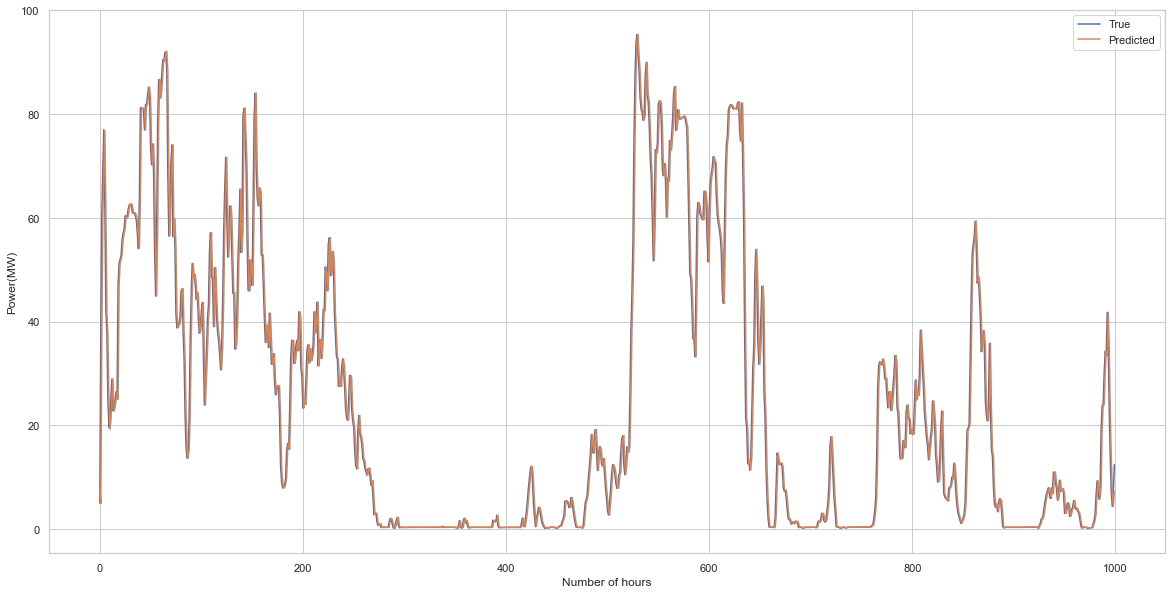

In [31]:
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations[0:1000], label="True")
pyplot.plot(predictions[0:1000], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power(MW)")

plt.savefig('./LSTM WF1')

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expectations, predictions)

2.723850752928075

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expectations, predictions)

0.25145887161430913

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(expectations, predictions)

22.102419402275192

In [35]:
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
smape(expectations, predictions)

20.70336333144868